In [1]:
import numpy as np
import pandas as pd

from os.path import isfile
import statsmodels.api as sm
from pandas import DateOffset
import matplotlib.pyplot as plt
from binance.client import Client
import statsmodels.tsa.api as smt
from scipy.optimize import minimize
import statsmodels.formula.api as smf
from datetime import datetime, timedelta
from data.binance import get_binance_historical_klines

# Monte-Carlo Simulation
Portfolio allocation simulation. Simulates different percent of allocated assets in the portfolio, select the best possible ratio.
### Period for Monte-Carlo simulation returns

In [2]:
period = 24

### Resample interval

In [3]:
resample_interval = 'W'

## Historical Data

In [4]:
end = pd.Timestamp.now(tz='UTC').floor('H')
start = end - pd.DateOffset(years=1)
start, end = start.strftime( "%Y-%m-%dT%H:%M:%S%z"), end.strftime( "%Y-%m-%dT%H:%M:%S%z")
start, end

('2019-10-20T11:00:00+0000', '2020-10-20T11:00:00+0000')

In [5]:
btc_usdt = get_binance_historical_klines('BTCUSDT', '1h', start, end_str=end)
btc_usdt.tail(5)

datetime      open      high       low     close  \
8763 2020-10-20 06:00:00+00:00  11755.53  11802.00  11740.14  11790.06   
8764 2020-10-20 07:00:00+00:00  11790.07  11849.00  11707.01  11735.46   
8765 2020-10-20 08:00:00+00:00  11735.45  11762.00  11702.13  11740.10   
8766 2020-10-20 09:00:00+00:00  11740.10  11820.00  11728.24  11785.19   
8767 2020-10-20 10:00:00+00:00  11785.20  11845.32  11774.13  11834.79   

           volume  quote_asset_volume  trades_quantity  taker_base_volume  \
8763  2013.783099        2.372144e+07            29078        1182.018031   
8764  3167.898814        3.732683e+07            45611        1648.397836   
8765  1986.778805        2.331638e+07            34084         871.354413   
8766  1799.784864        2.118471e+07            28799         902.969191   
8767  2140.446634        2.527306e+07            32516        1082.885899   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763        1.392590e+07         831.765068        9.795534e+06  
8764        1.943329e+07        1519.500978        1.789354e+07  
8765        1.022684e+07        1115.424392        1.308954e+07  
8766        1.062910e+07         896.815673        1.055561e+07  
8767        1.278786e+07        1057.560735        1.248520e+07

In [6]:
eth_usdt =  get_binance_historical_klines('ETHUSDT', '1h', start, end_str=end)
eth_usdt.tail(5)

datetime    open    high     low   close       volume  \
8763 2020-10-20 06:00:00+00:00  378.00  378.99  377.30  378.36  17613.69106   
8764 2020-10-20 07:00:00+00:00  378.36  379.75  374.50  375.41  39118.80943   
8765 2020-10-20 08:00:00+00:00  375.45  375.51  373.88  374.49  27698.29032   
8766 2020-10-20 09:00:00+00:00  374.49  376.85  374.24  376.05  17846.69943   
8767 2020-10-20 10:00:00+00:00  376.04  377.20  374.89  376.43  22167.38577   

      quote_asset_volume  trades_quantity  taker_base_volume  \
8763        6.660585e+06             8864         8625.80251   
8764        1.474436e+07            13266        14608.18185   
8765        1.037737e+07            11111        10928.23895   
8766        6.701543e+06             8592         8779.76605   
8767        8.331168e+06             8018        11471.17602   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763        3.261974e+06         8987.88855        3.398611e+06  
8764        5.507525e+06        24510.62758        9.236835e+06  
8765        4.094805e+06        16770.05137        6.282569e+06  
8766        3.297116e+06         9066.93338        3.404427e+06  
8767        4.311805e+06        10696.20975        4.019362e+06

In [7]:
xrp_usdt = get_binance_historical_klines('XRPUSDT', '1h', start, end_str=end)
xrp_usdt.tail(5)

datetime     open     high      low    close     volume  \
8763 2020-10-20 06:00:00+00:00  0.24684  0.24850  0.24630  0.24812  5985568.1   
8764 2020-10-20 07:00:00+00:00  0.24812  0.24827  0.24428  0.24529  7659042.7   
8765 2020-10-20 08:00:00+00:00  0.24528  0.24550  0.24300  0.24505  9043306.3   
8766 2020-10-20 09:00:00+00:00  0.24503  0.24666  0.24494  0.24635  3103821.4   
8767 2020-10-20 10:00:00+00:00  0.24635  0.24637  0.24506  0.24549  4900073.6   

      quote_asset_volume  trades_quantity  taker_base_volume  \
8763        1.480662e+06             2334          2952693.7   
8764        1.887331e+06             3616          3628615.0   
8765        2.212158e+06             3634          4075122.4   
8766        7.630967e+05             1823          1632308.6   
8767        1.203621e+06             2319          2033478.1   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763       729694.342245          3032874.4        7.509676e+05  
8764       894154.147814          4030427.7        9.931764e+05  
8765       996494.950443          4968183.9        1.215663e+06  
8766       401371.725440          1471512.8        3.617250e+05  
8767       499471.494288          2866595.5        7.041496e+05

In [8]:
bnb_usdt = get_binance_historical_klines('BNBUSDT', '1h', start, end_str=end)
bnb_usdt.tail(5)

datetime     open     high      low    close  \
8763 2020-10-20 06:00:00+00:00  29.9534  29.9780  29.8365  29.9166   
8764 2020-10-20 07:00:00+00:00  29.9201  29.9348  29.4000  29.6033   
8765 2020-10-20 08:00:00+00:00  29.6062  29.6157  29.3634  29.4215   
8766 2020-10-20 09:00:00+00:00  29.4273  29.5700  29.3639  29.4467   
8767 2020-10-20 10:00:00+00:00  29.4463  29.6429  29.2211  29.6213   

          volume  quote_asset_volume  trades_quantity  taker_base_volume  \
8763  114540.078        3.425489e+06             5701          29544.514   
8764  180672.476        5.353530e+06            11968          84524.371   
8765  207386.779        6.107463e+06            13318         104479.304   
8766   80011.623        2.355802e+06             8847          37507.140   
8767  166452.178        4.899996e+06            13876          89072.964   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763        8.836666e+05          84995.564        2.541823e+06  
8764        2.505203e+06          96148.105        2.848327e+06  
8765        3.076772e+06         102907.475        3.030691e+06  
8766        1.104426e+06          42504.483        1.251376e+06  
8767        2.623061e+06          77379.214        2.276935e+06

In [9]:
link_usdt = get_binance_historical_klines('LINKUSDT', '1h', start, end_str=end)
link_usdt.tail(5)

datetime     open     high      low    close     volume  \
8763 2020-10-20 06:00:00+00:00  10.7701  10.8329  10.7309  10.8005  112866.67   
8764 2020-10-20 07:00:00+00:00  10.8000  10.8284  10.6208  10.6877  230128.86   
8765 2020-10-20 08:00:00+00:00  10.6883  10.7061  10.5549  10.6799  266188.13   
8766 2020-10-20 09:00:00+00:00  10.6791  10.7450  10.6469  10.6645  210587.39   
8767 2020-10-20 10:00:00+00:00  10.6641  10.6785  10.5892  10.6392  230474.09   

      quote_asset_volume  trades_quantity  taker_base_volume  \
8763        1.217248e+06             2797           61420.75   
8764        2.470628e+06             4098          100397.94   
8765        2.833193e+06             4692          138713.58   
8766        2.249805e+06             4137          105203.79   
8767        2.449701e+06             3869           85422.54   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763        6.627395e+05           51445.92        5.545081e+05  
8764        1.078528e+06          129730.92        1.392100e+06  
8765        1.477636e+06          127474.55        1.355558e+06  
8766        1.124251e+06          105383.60        1.125555e+06  
8767        9.085467e+05          145051.55        1.541154e+06

In [10]:
ada_usdt = get_binance_historical_klines('ADAUSDT', '1h', start, end_str=end)
ada_usdt.tail(5)

datetime     open     high      low    close  \
8763 2020-10-20 06:00:00+00:00  0.10743  0.10786  0.10705  0.10766   
8764 2020-10-20 07:00:00+00:00  0.10762  0.10787  0.10449  0.10550   
8765 2020-10-20 08:00:00+00:00  0.10550  0.10592  0.10476  0.10529   
8766 2020-10-20 09:00:00+00:00  0.10526  0.10594  0.10517  0.10572   
8767 2020-10-20 10:00:00+00:00  0.10574  0.10581  0.10523  0.10530   

          volume  quote_asset_volume  trades_quantity  taker_base_volume  \
8763   6456991.1        6.935796e+05             1845          3044481.5   
8764  24093325.6        2.558247e+06             6432          9292108.2   
8765  18287860.7        1.926102e+06             4278          8329094.1   
8766   6587606.1        6.950424e+05             1722          3063800.3   
8767   6313252.2        6.661415e+05             1512          2936899.8   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763       327045.430392          3412509.6        3.665342e+05  
8764       986308.154028         14801217.4        1.571939e+06  
8765       877290.842902          9958766.6        1.048812e+06  
8766       323251.005908          3523805.8        3.717914e+05  
8767       309927.667909          3376352.4        3.562138e+05

In [11]:
eos_usdt = get_binance_historical_klines('EOSUSDT', '1h', start, end_str=end)
eos_usdt.tail(5)

datetime    open    high     low   close     volume  \
8763 2020-10-20 06:00:00+00:00  2.5654  2.5750  2.5583  2.5712  394301.15   
8764 2020-10-20 07:00:00+00:00  2.5703  2.5774  2.5497  2.5578  327042.54   
8765 2020-10-20 08:00:00+00:00  2.5578  2.5625  2.5466  2.5602  242685.50   
8766 2020-10-20 09:00:00+00:00  2.5598  2.5649  2.5574  2.5635  204677.15   
8767 2020-10-20 10:00:00+00:00  2.5626  2.5636  2.5536  2.5620  175840.93   

      quote_asset_volume  trades_quantity  taker_base_volume  \
8763        1.011111e+06             1715          191533.52   
8764        8.384102e+05             2026          146700.80   
8765        6.204442e+05             1699          119805.17   
8766        5.239605e+05             1078           77264.22   
8767        4.499200e+05             1020           77637.46   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763       491231.606021          202767.63       519879.644850  
8764       376170.482327          180341.74       462239.719682  
8765       306340.993997          122880.33       314103.179939  
8766       197813.797044          127412.93       326146.700580  
8767       198644.379045           98203.47       251275.602970

In [12]:
trx_usdt = get_binance_historical_klines('TRXUSDT', '1h', start, end_str=end)
trx_usdt.tail(5)

datetime     open     high      low    close  \
8763 2020-10-20 06:00:00+00:00  0.02569  0.02575  0.02560  0.02573   
8764 2020-10-20 07:00:00+00:00  0.02573  0.02580  0.02548  0.02550   
8765 2020-10-20 08:00:00+00:00  0.02550  0.02559  0.02541  0.02554   
8766 2020-10-20 09:00:00+00:00  0.02553  0.02569  0.02552  0.02563   
8767 2020-10-20 10:00:00+00:00  0.02563  0.02575  0.02555  0.02574   

          volume  quote_asset_volume  trades_quantity  taker_base_volume  \
8763  19857213.3       509775.756996             1287         10641426.6   
8764  31021222.4       794993.575534             2031         13353036.2   
8765  23851315.8       607817.026604             1826         12409615.7   
8766  13429405.2       343765.409547             1207          6888374.5   
8767  23262975.6       596011.416816             1349         13995182.9   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763       273158.923889          9215786.7       236616.833107  
8764       342493.694131         17668186.2       452499.881403  
8765       316261.359690         11441700.1       291555.666914  
8766       176327.651833          6541030.7       167437.757714  
8767       358574.184081          9267792.7       237437.232735

In [13]:
neo_usdt = get_binance_historical_klines('NEOUSDT', '1h', start, end_str=end)
neo_usdt.tail(5)

datetime    open    high     low   close     volume  \
8763 2020-10-20 06:00:00+00:00  17.601  17.651  17.554  17.636  22025.307   
8764 2020-10-20 07:00:00+00:00  17.636  17.703  17.464  17.531  39191.137   
8765 2020-10-20 08:00:00+00:00  17.533  17.587  17.466  17.564  20497.480   
8766 2020-10-20 09:00:00+00:00  17.561  17.686  17.527  17.635  20314.478   
8767 2020-10-20 10:00:00+00:00  17.635  17.701  17.573  17.665  25545.811   

      quote_asset_volume  trades_quantity  taker_base_volume  \
8763       387703.613159             1639           8145.723   
8764       690028.434971             2849          20232.642   
8765       359235.486968             1246          10414.845   
8766       357865.927228             1643           9901.186   
8767       450604.705783             1953          11599.787   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763       143455.268907          13879.584       244248.344252  
8764       356456.156320          18958.495       333572.278651  
8765       182575.535997          10082.635       176659.950971  
8766       174461.217706          10413.292       183404.709522  
8767       204636.635944          13946.024       245968.069839

In [14]:
atom_usdt = get_binance_historical_klines('ATOMUSDT', '1h', start, end_str=end)
atom_usdt.tail(5)

datetime   open   high    low  close     volume  \
8763 2020-10-20 06:00:00+00:00  5.467  5.498  5.443  5.484  44697.019   
8764 2020-10-20 07:00:00+00:00  5.482  5.496  5.383  5.406  57708.793   
8765 2020-10-20 08:00:00+00:00  5.407  5.446  5.367  5.415  74336.978   
8766 2020-10-20 09:00:00+00:00  5.415  5.452  5.408  5.431  50056.341   
8767 2020-10-20 10:00:00+00:00  5.435  5.444  5.386  5.399  70388.053   

      quote_asset_volume  trades_quantity  taker_base_volume  \
8763       244639.922263              850          23330.489   
8764       314016.979554             1112          26327.582   
8765       401944.877263             1258          35231.153   
8766       271828.908626              840          23582.411   
8767       380350.456242              997          43876.996   

      taker_quote_volume  maker_base_volume  maker_quote_volume  
8763       127757.237505          21366.530       116882.684758  
8764       143371.098595          31381.211       170645.880959  
8765       190663.156397          39105.825       211281.720866  
8766       128066.368864          26473.930       143762.539762  
8767       237118.697659          26511.057       143231.758583

### Logarithmic periodic returns

In [15]:
btc_usdt['log return'] = np.log(btc_usdt['close'] / btc_usdt['close'].shift(period))
xrp_usdt['log return'] = np.log(xrp_usdt['close'] / xrp_usdt['close'].shift(period))
link_usdt['log return'] = np.log(link_usdt['close'] / link_usdt['close'].shift(period))
eth_usdt['log return'] = np.log(eth_usdt['close'] / eth_usdt['close'].shift(period))
bnb_usdt['log return'] = np.log(bnb_usdt['close'] / bnb_usdt['close'].shift(period))
ada_usdt['log return'] = np.log(ada_usdt['close'] / ada_usdt['close'].shift(period))
eos_usdt['log return'] = np.log(eos_usdt['close'] / eos_usdt['close'].shift(period))
trx_usdt['log return'] = np.log(trx_usdt['close'] / trx_usdt['close'].shift(period))
neo_usdt['log return'] = np.log(neo_usdt['close'] / neo_usdt['close'].shift(period))
atom_usdt['log return'] = np.log(atom_usdt['close'] / atom_usdt['close'].shift(period))

### Selecting the least long dataset starting point
Alignining it to match the start of the Day

In [16]:
log_returns = pd.DataFrame()
log_returns['BTCUSDT'] = btc_usdt['log return']
log_returns['XRPUSDT'] = xrp_usdt['log return']
log_returns['LINKUSDT'] = link_usdt['log return']
log_returns['ETHUSDT'] = eth_usdt['log return']
log_returns['BNBUSDT'] = bnb_usdt['log return']
log_returns['ADAUSDT'] = ada_usdt['log return']
log_returns['EOSUSDT'] = eos_usdt['log return']
log_returns['TRXUSDT'] = trx_usdt['log return']
log_returns['NEOUSDT'] = neo_usdt['log return']
log_returns['ATOMUSDT'] = atom_usdt['log return']
index = btc_usdt['datetime']
log_returns.set_index(index, inplace=True)

In [17]:
log_returns.cov()

BTCUSDT   XRPUSDT  LINKUSDT   ETHUSDT   BNBUSDT   ADAUSDT  \
BTCUSDT   0.001402  0.001133  0.001465  0.001483  0.001435  0.001463   
XRPUSDT   0.001133  0.001482  0.001536  0.001553  0.001439  0.001592   
LINKUSDT  0.001465  0.001536  0.004131  0.002068  0.002053  0.002303   
ETHUSDT   0.001483  0.001553  0.002068  0.002139  0.001858  0.001977   
BNBUSDT   0.001435  0.001439  0.002053  0.001858  0.002354  0.001889   
ADAUSDT   0.001463  0.001592  0.002303  0.001977  0.001889  0.002747   
EOSUSDT   0.001490  0.001515  0.001858  0.001873  0.001784  0.001912   
TRXUSDT   0.001373  0.001525  0.001865  0.001875  0.001833  0.001969   
NEOUSDT   0.001551  0.001579  0.002152  0.001975  0.001925  0.002071   
ATOMUSDT  0.001539  0.001567  0.002621  0.002014  0.002069  0.002185   

           EOSUSDT   TRXUSDT   NEOUSDT  ATOMUSDT  
BTCUSDT   0.001490  0.001373  0.001551  0.001539  
XRPUSDT   0.001515  0.001525  0.001579  0.001567  
LINKUSDT  0.001858  0.001865  0.002152  0.002621  
ETHUSDT   0.001873  0.001875  0.001975  0.002014  
BNBUSDT   0.001784  0.001833  0.001925  0.002069  
ADAUSDT   0.001912  0.001969  0.002071  0.002185  
EOSUSDT   0.002259  0.001839  0.001952  0.002008  
TRXUSDT   0.001839  0.002810  0.002088  0.001882  
NEOUSDT   0.001952  0.002088  0.002991  0.002172  
ATOMUSDT  0.002008  0.001882  0.002172  0.003731

In [18]:
weights = np.array(np.random.random(len(log_returns.columns)))
weights

array([0.16863016, 0.09698094, 0.87512925, 0.13596371, 0.55868159,
       0.63078329, 0.64430956, 0.14040206, 0.11147141, 0.34772061])

## Rebalance

In [19]:
weights = weights / np.sum(weights)
weights

array([0.04545198, 0.0261399 , 0.23587928, 0.03664718, 0.15058508,
       0.17001912, 0.17366495, 0.03784348, 0.03004561, 0.0937234 ])

In [20]:
assets = pd.DataFrame()
assets['BTCUSDT'] = btc_usdt['close']
assets['XRPUSDT'] = xrp_usdt['close']
assets['ETHUSDT'] = eth_usdt['close']
assets['LINKUSDT'] = link_usdt['close']
assets['BNBUSDT'] = bnb_usdt['close']
assets['ADAUSDT'] = ada_usdt['close']
assets['EOSUSDT'] = eos_usdt['close']
assets['TRXUSD'] = trx_usdt['close']
assets['NEOUSDT'] = neo_usdt['close']
assets['ATOMUSDT'] = atom_usdt['close']
index = btc_usdt['datetime']
assets.set_index(index, inplace=True)

## Expected Return

In [22]:
exp_ret = np.sum(log_returns.mean() * weights) * days
exp_ret

0.7282447795722029

## Expected Volatility

In [23]:
exp_vol = np.sqrt(weights.T, np.dot(log_returns.cov() * days, weights))
exp_vol

array([0.21319471, 0.16167839, 0.48567405, 0.19143454, 0.38805294,
       0.41233375, 0.41673127, 0.19453401, 0.17333671, 0.30614278])

## Sharpe Ratio

In [24]:
sharpe_ratios = exp_ret / exp_vol
sharpe_ratios

array([3.41586703, 4.50428012, 1.49945171, 3.8041452 , 1.87666348,
       1.76615369, 1.74751654, 3.74353456, 4.20133041, 2.37877499])

# Monte-Carlo Simulation

In [25]:
def monte_carlo(assets, log_returns, periods, num_portfolios=500):
    all_weights = np.zeros((num_portfolios, len(assets.columns)))
    returns = np.zeros(num_portfolios)
    volatilities = np.zeros(num_portfolios)
    sharpe_ratio = np.zeros(num_portfolios)
    for i in range(num_portfolios):
        weights = np.array(np.random.random(len(assets.columns)))
        # Rebalance 
        weights = weights / np.sum(weights)
        # Save weights
        all_weights[i, :] = weights
        # Expected return
        returns[i] = np.sum((log_returns.mean() * weights) * periods)
        volatilities[i] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * periods, weights)))
        # Sharpe Ratio
        sharpe_ratio[i] = returns[i] / volatilities[i]
    return volatilities, returns, sharpe_ratio, all_weights

## N-Periodic Monte-Carlo simulation
Applies Monte-Carlo simulation for each resample period in the data. For instance - Simulates each week portfollio allocations for the whole given data.

In [26]:
def simulate_n_period(periodic_interval: str=resample_interval):
    n_periodic_results = assets.groupby(pd.Grouper(freq=resample_interval)).apply(monte_carlo, log_returns, period)
    return n_periodic_results

### Computed expected volatility, return, sharpe ration and porfolio weights for each simulated period

In [27]:
monte_carlo_results = simulate_n_period(periodic_interval=resample_interval)
monte_carlo_results

datetime
2019-10-20 00:00:00+00:00    ([0.21800046823429628, 0.20954963618626454, 0....
2019-10-27 00:00:00+00:00    ([0.21378636321166092, 0.19113153267370872, 0....
2019-11-03 00:00:00+00:00    ([0.21460199082743892, 0.2045141665880839, 0.2...
2019-11-10 00:00:00+00:00    ([0.2129482018085243, 0.2147398058132202, 0.21...
2019-11-17 00:00:00+00:00    ([0.20721726547216965, 0.21121133910727724, 0....
2019-11-24 00:00:00+00:00    ([0.21412496242187878, 0.20801115477272983, 0....
2019-12-01 00:00:00+00:00    ([0.21443120557835518, 0.216060721526471, 0.20...
2019-12-08 00:00:00+00:00    ([0.21168237496956654, 0.21404239430699837, 0....
2019-12-15 00:00:00+00:00    ([0.22174248199426494, 0.21120184420125282, 0....
2019-12-22 00:00:00+00:00    ([0.217086797912846, 0.22252280417957904, 0.21...
2019-12-29 00:00:00+00:00    ([0.22450601690327418, 0.20619475496572942, 0....
2020-01-05 00:00:00+00:00    ([0.22072811542963822, 0.21336558463202493, 0....
2020-01-12 00:00:00+00:00    ([0.2159470338

### Best Portfolio Allocations computed for each resampling period based on Monte-Carlo Simulation

In [28]:
def compute_portfolio(assets, log_returns, periods=period, num_portfolios=500):
    volatilities, returns, sharpe_ratio, all_weights = monte_carlo(assets, log_returns, periods=periods,
                                                                   num_portfolios=num_portfolios)
    max_sharpe = sharpe_ratio.max()
    max_sharpe_index = sharpe_ratio.argmax()
    print(f'Max Sharpe Ratio: {max_sharpe}. Max returns: {returns[max_sharpe_index]}')
    portfolio = list(all_weights[max_sharpe_index, :])
    portfolio.append(returns[max_sharpe_index])
    portfolio.append(max_sharpe)
    portfolio.append(volatilities[max_sharpe_index])
    portfolio = pd.DataFrame([portfolio], columns=['BTCUSDT', 'XRPUSDT', 'ETHUSDT', 'LINKUSDT', 'BNBUSDT', 
                                                   'ADAUSDT', 'EOSUSDT','TRXUSD', 'NEOUSDT', 'ATOMUSD', 'Returns', 
                                                   'Sharpe Ratio', 'Volatility'])
    return portfolio

In [29]:
def simulate_best_periodic_portfolio(assets, log_returns, interval=resample_interval, num_portfolios=500):
    best_portfolios = assets.groupby(pd.Grouper(freq=interval)).apply(
        compute_portfolio, log_returns, periods=period, num_portfolios=num_portfolios)
    best_portfolios.index = best_portfolios.index.droplevel(level=1)
    return best_portfolios

In [30]:
log_returns = log_returns.astype('float64')
assets = assets.astype('float64')

In [31]:
log_returns

BTCUSDT   XRPUSDT  LINKUSDT   ETHUSDT   BNBUSDT  \
datetime                                                                      
2019-10-20 11:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2019-10-20 12:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2019-10-20 13:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2019-10-20 14:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2019-10-20 15:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2020-10-20 06:00:00+00:00  0.029254  0.028950  0.006344  0.008760 -0.000942   
2020-10-20 07:00:00+00:00  0.023544  0.019389 -0.007392  0.001013 -0.013048   
2020-10-20 08:00:00+00:00  0.023590  0.016416 -0.005630 -0.002667 -0.023251   
2020-10-20 09:00:00+00:00  0.025582  0.004027 -0.014633 -0.000319 -0.021943   
2020-10-20 10:00:00+00:00  0.030459 -0.001059 -0.015001  0.001462 -0.018049   

                            ADAUSDT   EOSUSDT   TRXUSDT   NEOUSDT  ATOMUSDT  
datetime                                                                     
2019-10-20 11:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2019-10-20 12:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2019-10-20 13:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2019-10-20 14:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
2019-10-20 15:00:00+00:00       NaN       NaN       NaN       NaN       NaN  
...                             ...       ...       ...       ...       ...  
2020-10-20 06:00:00+00:00  0.011115  0.013627  0.000778  0.018311 -0.022003  
2020-10-20 07:00:00+00:00 -0.009528  0.008323 -0.010533  0.016738 -0.037398  
2020-10-20 08:00:00+00:00 -0.011614  0.006544 -0.009741  0.023037 -0.035021  
2020-10-20 09:00:00+00:00 -0.012315  0.007125 -0.006998  0.023872 -0.037761  
2020-10-20 10:00:00+00:00 -0.025503  0.006697 -0.003490  0.025920 -0.041007  

[8768 rows x 10 columns]

In [32]:
best_portfolios = simulate_best_periodic_portfolio(assets, log_returns, resample_interval)

Max Sharpe Ratio: 0.2624874379293214. Max returns: 0.05993401677634135
Max Sharpe Ratio: 0.2514327946289919. Max returns: 0.056108107788519296
Max Sharpe Ratio: 0.2538834517343706. Max returns: 0.05805631099068175
Max Sharpe Ratio: 0.25296855873175894. Max returns: 0.05735385077739573
Max Sharpe Ratio: 0.2706270876659389. Max returns: 0.06185452185034766
Max Sharpe Ratio: 0.25997420577763974. Max returns: 0.059583649097495535
Max Sharpe Ratio: 0.26022839022056043. Max returns: 0.05675072435184546
Max Sharpe Ratio: 0.26754442896878095. Max returns: 0.0631973004504091
Max Sharpe Ratio: 0.25024716738874425. Max returns: 0.053796677183594765
Max Sharpe Ratio: 0.23714156961966867. Max returns: 0.05287883550687979
Max Sharpe Ratio: 0.2573370962077146. Max returns: 0.05594808090474982
Max Sharpe Ratio: 0.23922107049570587. Max returns: 0.05218729102315241
Max Sharpe Ratio: 0.2589595189869723. Max returns: 0.05879264045846221
Max Sharpe Ratio: 0.24588128763635975. Max returns: 0.05563723980586

In [33]:
best_portfolios

BTCUSD    XRPUSD    ETHUSD  LINKUSDT   BNBUSDT  \
datetime                                                                      
2019-10-20 00:00:00+00:00  0.057593  0.030455  0.264387  0.085303  0.024316   
2019-10-27 00:00:00+00:00  0.045373  0.031890  0.169512  0.243911  0.101906   
2019-11-03 00:00:00+00:00  0.001579  0.011904  0.201515  0.115242  0.243051   
2019-11-10 00:00:00+00:00  0.038510  0.011067  0.202893  0.158536  0.016245   
2019-11-17 00:00:00+00:00  0.048671  0.017309  0.217206  0.170357  0.012606   
2019-11-24 00:00:00+00:00  0.042256  0.044313  0.243160  0.146063  0.043111   
2019-12-01 00:00:00+00:00  0.194160  0.008657  0.218357  0.210414  0.030001   
2019-12-08 00:00:00+00:00  0.072419  0.076812  0.425054  0.122312  0.056477   
2019-12-15 00:00:00+00:00  0.225593  0.005553  0.182274  0.185304  0.040270   
2019-12-22 00:00:00+00:00  0.106546  0.051722  0.216612  0.115130  0.047756   
2019-12-29 00:00:00+00:00  0.212199  0.001073  0.218541  0.213689  0.043907   
2020-01-05 00:00:00+00:00  0.125344  0.028789  0.198773  0.192865  0.137556   
2020-01-12 00:00:00+00:00  0.025181  0.021378  0.217119  0.138825  0.117570   
2020-01-19 00:00:00+00:00  0.002563  0.024707  0.219358  0.174847  0.137703   
2020-01-26 00:00:00+00:00  0.069897  0.054760  0.239792  0.129989  0.008757   
2020-02-02 00:00:00+00:00  0.007433  0.032768  0.227090  0.085305  0.123255   
2020-02-09 00:00:00+00:00  0.096716  0.044500  0.171955  0.157837  0.034688   
2020-02-16 00:00:00+00:00  0.088027  0.079710  0.234570  0.171624  0.019949   
2020-02-23 00:00:00+00:00  0.083221  0.024655  0.263805  0.192474  0.038673   
2020-03-01 00:00:00+00:00  0.029797  0.035417  0.289770  0.121642  0.026170   
2020-03-08 00:00:00+00:00  0.056931  0.024021  0.287717  0.014128  0.063695   
2020-03-15 00:00:00+00:00  0.061683  0.040488  0.286422  0.235194  0.032127   
2020-03-22 00:00:00+00:00  0.005211  0.007318  0.248351  0.034885  0.017361   
2020-03-29 00:00:00+00:00  0.187851  0.049844  0.200623  0.188150  0.018399   
2020-04-05 00:00:00+00:00  0.165494  0.038464  0.328763  0.190040  0.017898   
2020-04-12 00:00:00+00:00  0.047538  0.090122  0.254202  0.081640  0.045146   
2020-04-19 00:00:00+00:00  0.000868  0.013063  0.271179  0.145697  0.138283   
2020-04-26 00:00:00+00:00  0.066337  0.002202  0.187309  0.088001  0.171872   
2020-05-03 00:00:00+00:00  0.045085  0.012595  0.248137  0.199474  0.157309   
2020-05-10 00:00:00+00:00  0.173060  0.004780  0.211883  0.146737  0.095708   
2020-05-17 00:00:00+00:00  0.153052  0.031071  0.213231  0.151242  0.152914   
2020-05-24 00:00:00+00:00  0.051944  0.000169  0.234033  0.130201  0.034170   
2020-05-31 00:00:00+00:00  0.017921  0.088186  0.296129  0.150197  0.096969   
2020-06-07 00:00:00+00:00  0.010396  0.026809  0.169002  0.011495  0.042533   
2020-06-14 00:00:00+00:00  0.108680  0.028607  0.177598  0.101597  0.089908   
2020-06-21 00:00:00+00:00  0.208160  0.093858  0.228588  0.098570  0.030378   
2020-06-28 00:00:00+00:00  0.073224  0.012595  0.196434  0.161720  0.007064   
2020-07-05 00:00:00+00:00  0.007815  0.003049  0.221330  0.131037  0.034381   
2020-07-12 00:00:00+00:00  0.003176  0.019825  0.231285  0.255783  0.117421   
2020-07-19 00:00:00+00:00  0.104353  0.005354  0.243018  0.052088  0.028265   
2020-07-26 00:00:00+00:00  0.066885  0.013686  0.163593  0.098799  0.137429   
2020-08-02 00:00:00+00:00  0.013221  0.028681  0.223244  0.026417  0.064101   
2020-08-09 00:00:00+00:00  0.006396  0.035805  0.177627  0.071198  0.066263   
2020-08-16 00:00:00+00:00  0.042209  0.028139  0.219086  0.179576  0.016727   
2020-08-23 00:00:00+00:00  0.016681  0.020855  0.303336  0.013105  0.028338   
2020-08-30 00:00:00+00:00  0.042784  0.002825  0.168773  0.098301  0.079321   
2020-09-06 00:00:00+00:00  0.040386  0.065813  0.216994  0.179845  0.027300   
2020-09-13 00:00:00+00:00  0.050743  0.028514  0.243137  0.159076  0.018596   
2020-09-20 00:00:00+00:00  0.071932  0.073598  0.282054  0.188502  0.029029   


In [34]:
cumulative_results = best_portfolios.cumsum().sum()
cumulative_results

BTCUSD          113.037656
XRPUSD           45.392327
ETHUSD          345.489953
LINKUSDT        213.126188
BNBUSDT          99.464767
ADAUSDT         265.164521
EOSUSDT          39.218048
TRXUSD          101.522694
NEOUSDT         179.362528
ATOMUSD          83.221316
Returns          85.223229
Sharpe Ratio    376.762152
Volatility      335.796960
dtype: float64

In [35]:
cumulative_assets = cumulative_results.drop(labels=['Returns', 'Sharpe Ratio'], axis=0)
cumulative_assets

BTCUSD        113.037656
XRPUSD         45.392327
ETHUSD        345.489953
LINKUSDT      213.126188
BNBUSDT        99.464767
ADAUSDT       265.164521
EOSUSDT        39.218048
TRXUSD        101.522694
NEOUSDT       179.362528
ATOMUSD        83.221316
Volatility    335.796960
dtype: float64

In [36]:
cumulative_assets.sum()

1820.796959653359

In [42]:
def plot_frontier(resulting_dataframe, simulation_results):
    i = 0
    for index, row in resulting_dataframe.iterrows():
        plt.figure(figsize=(19, 10))
        plt.scatter(simulation_results[i][0], simulation_results[i][1], c=simulation_results[i][2], cmap='plasma')
        plt.colorbar(label='Sharpe Ratio')
        plt.xlabel(xlabel='Volatility')
        plt.ylabel(ylabel='Return')
        plt.scatter(row['Volatility'], row['Returns'], color='red', s=50, edgecolors='black')
        plt.savefig(f'plots/Monte-Carlo {i} week.png')
        i += 1

<ipython-input-40-e5c80f6c7242>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(19, 10))


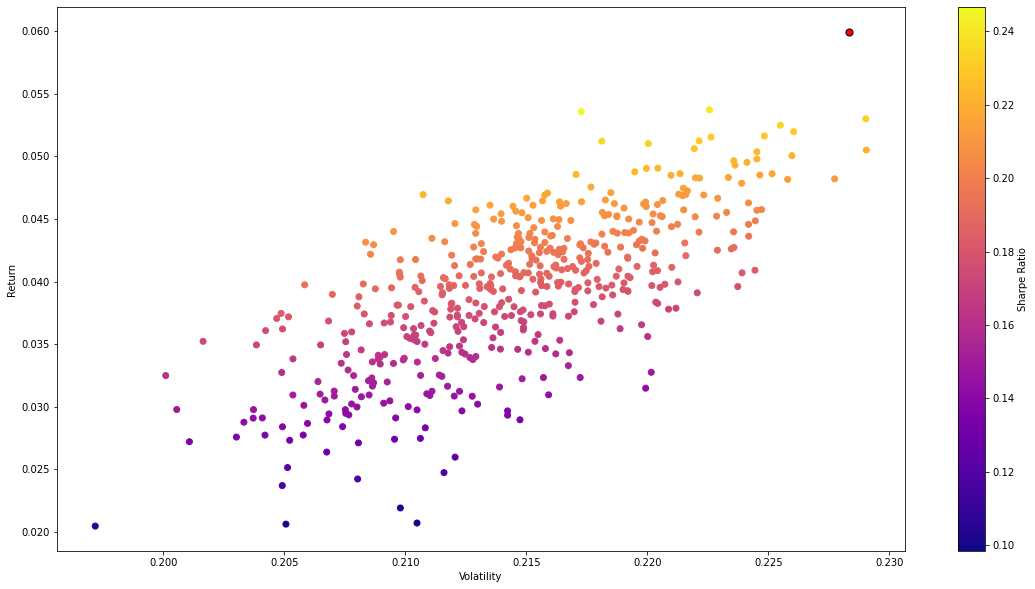

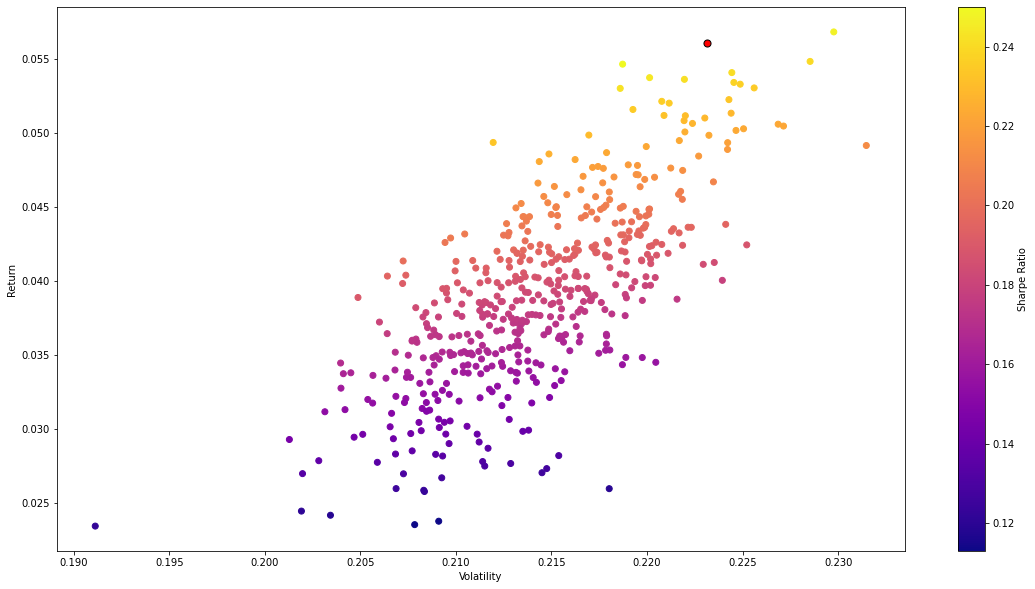

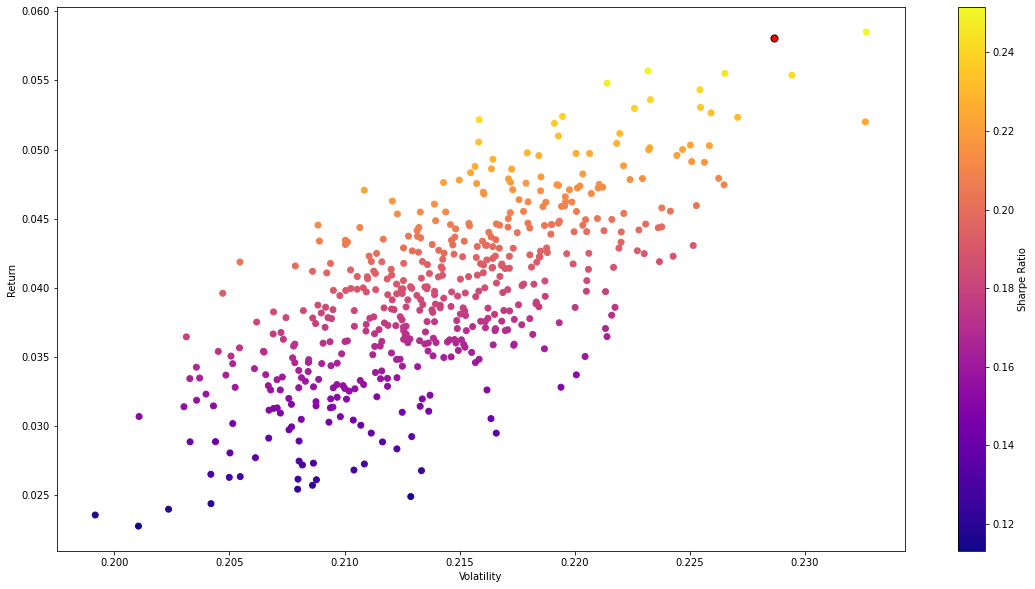

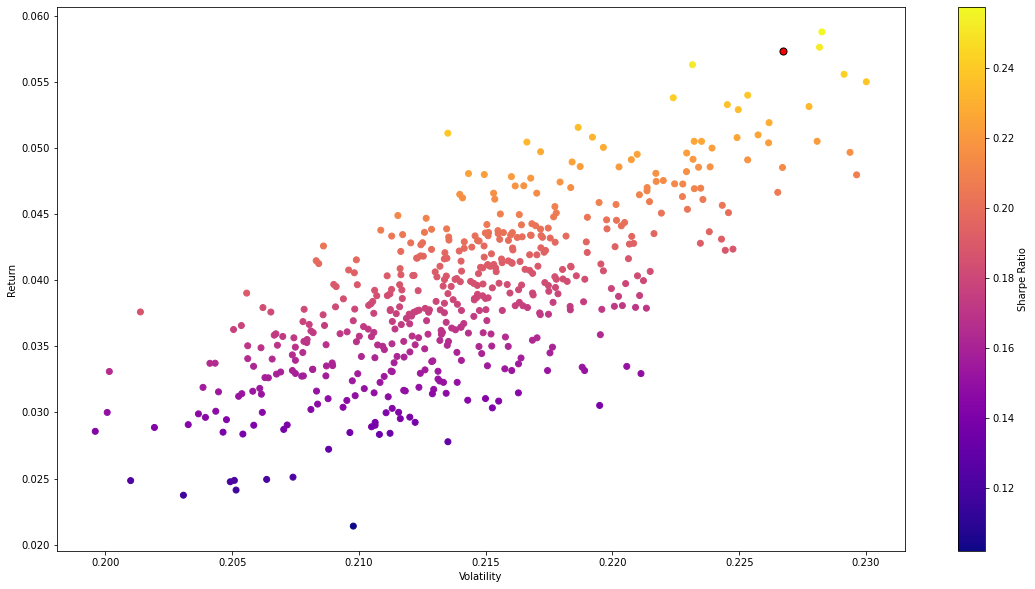

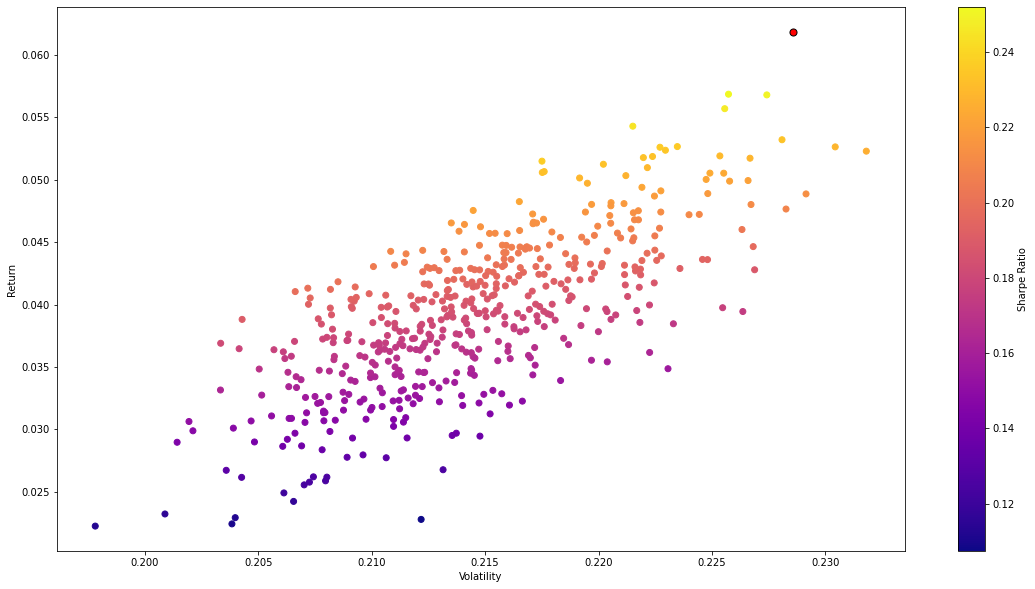

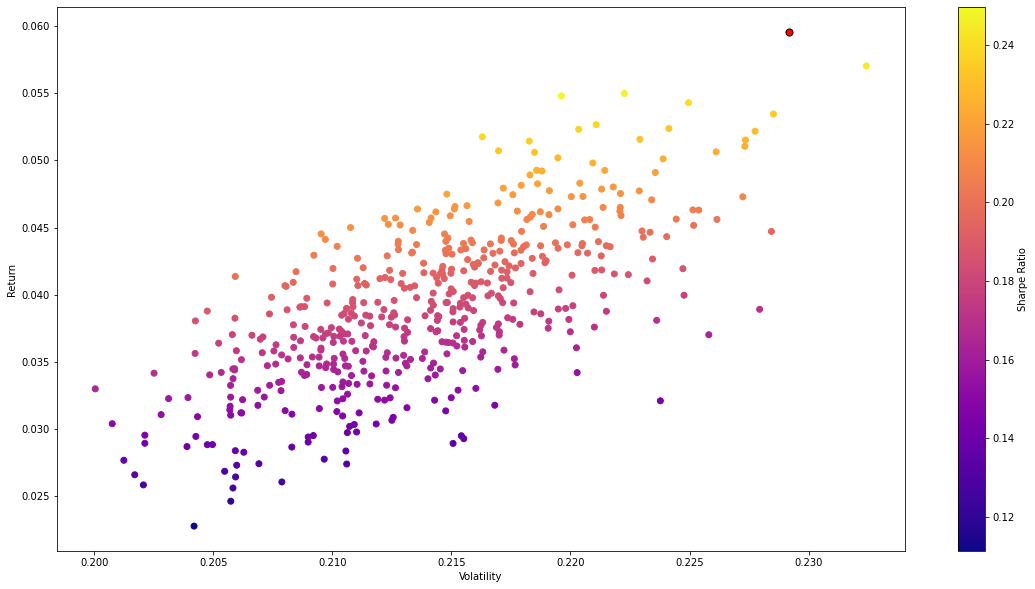

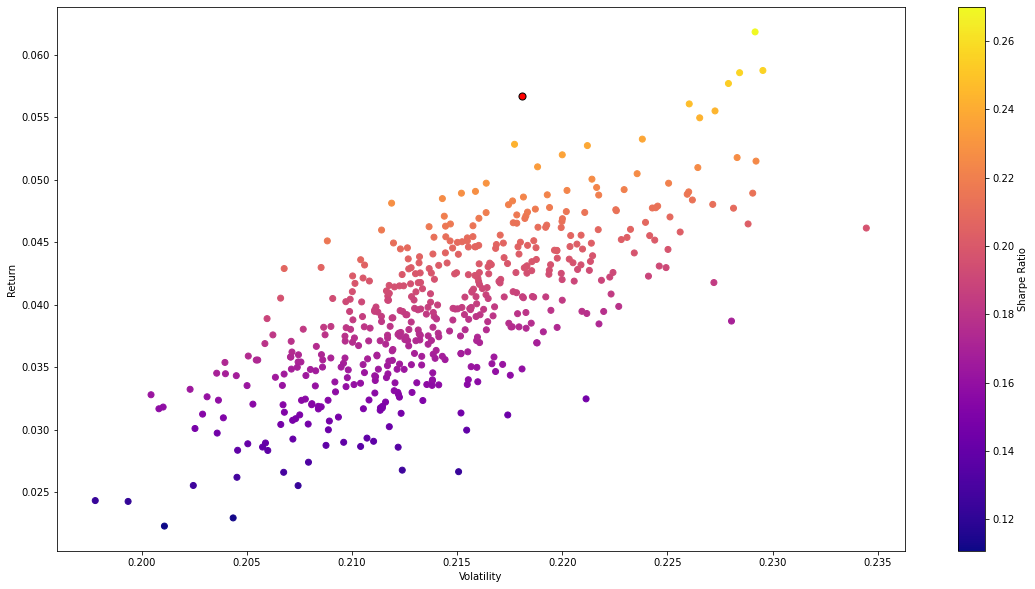

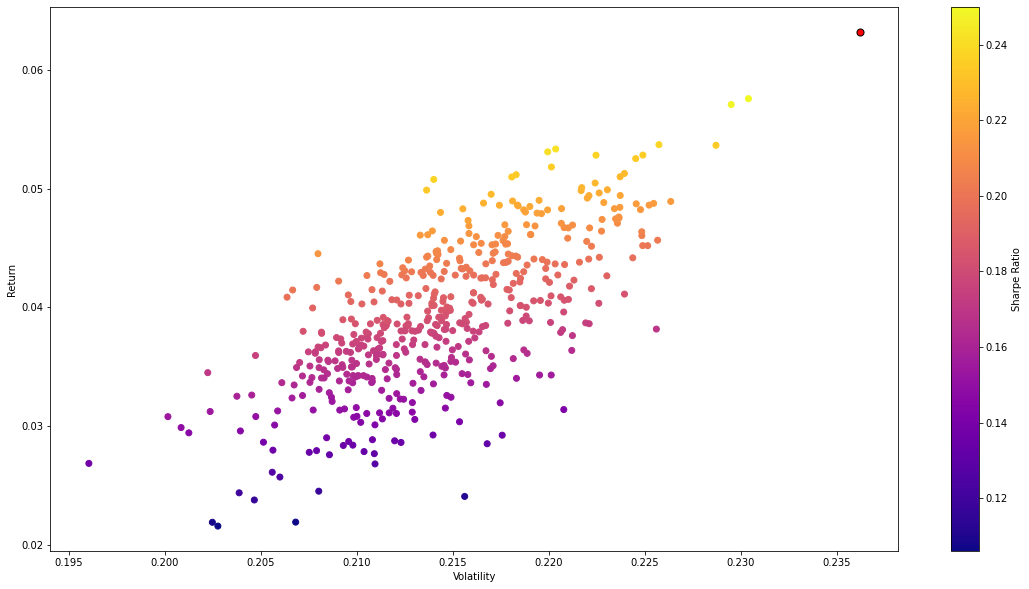

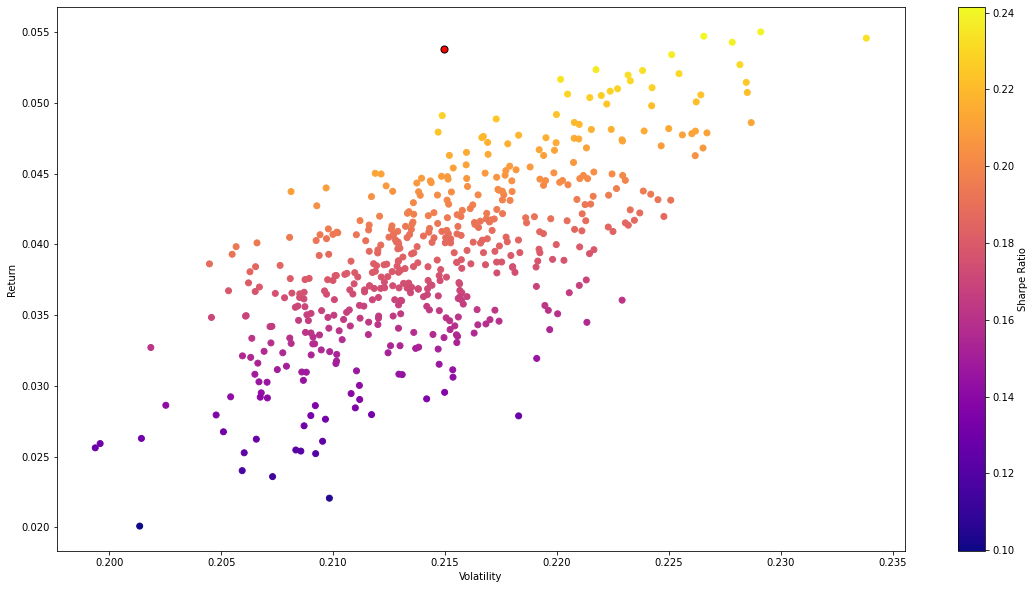

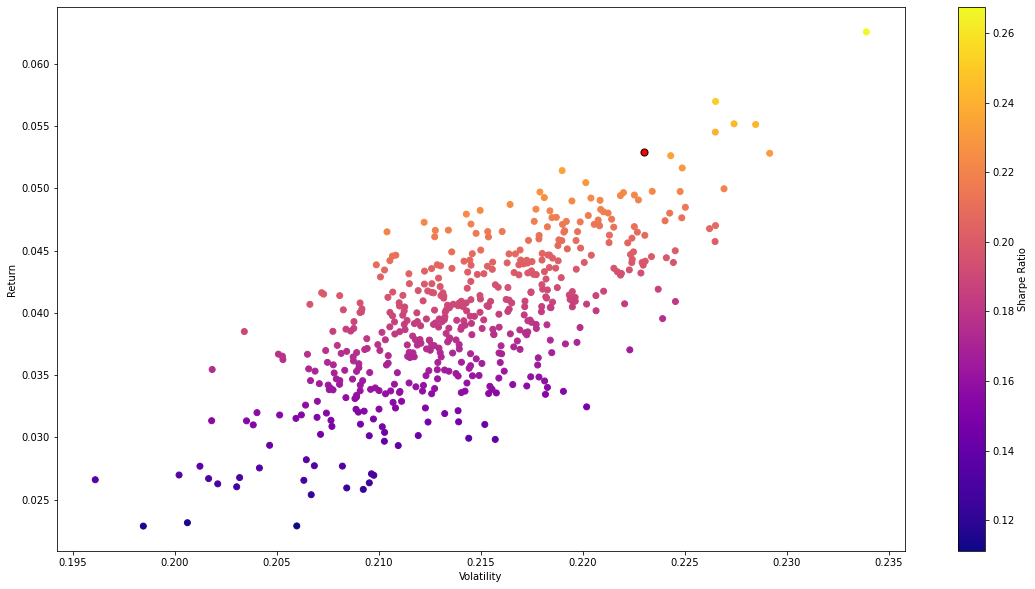

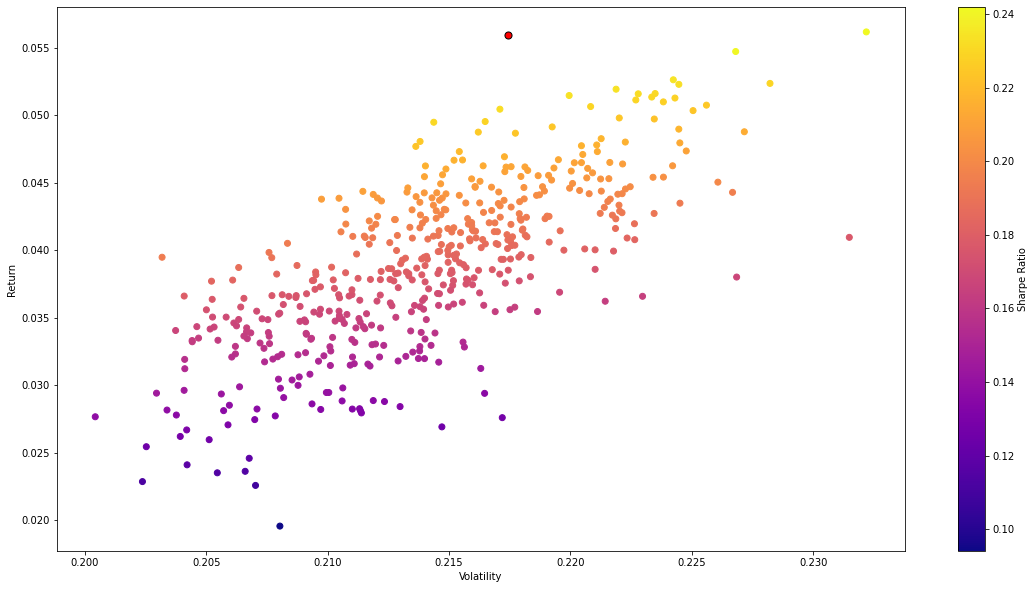

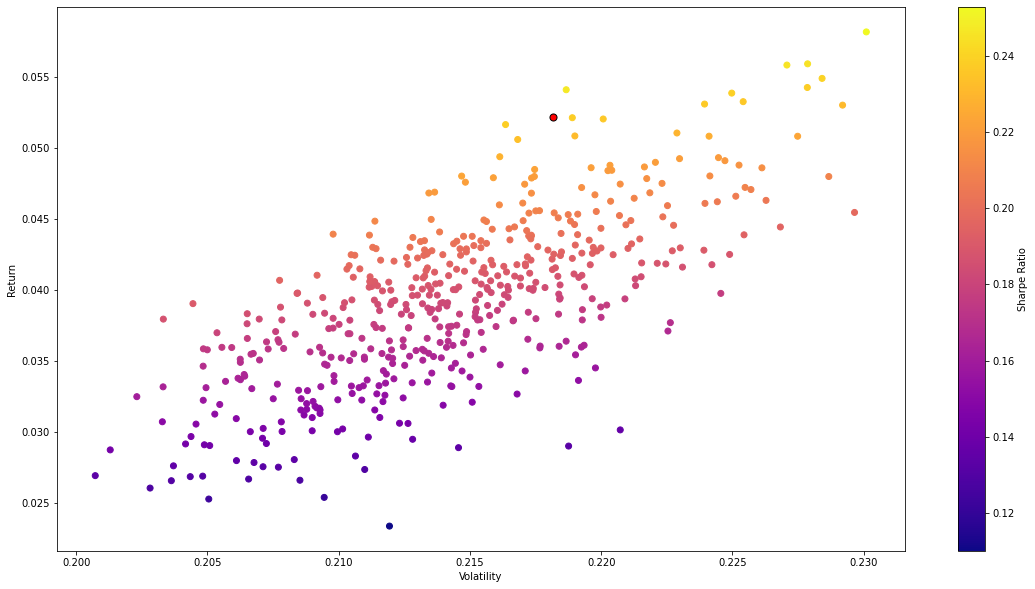

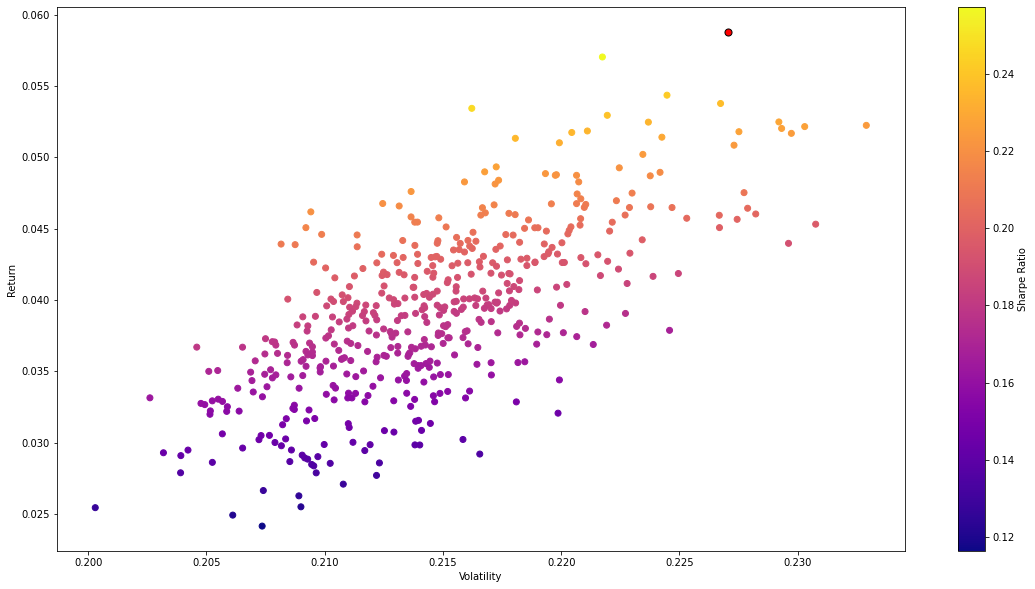

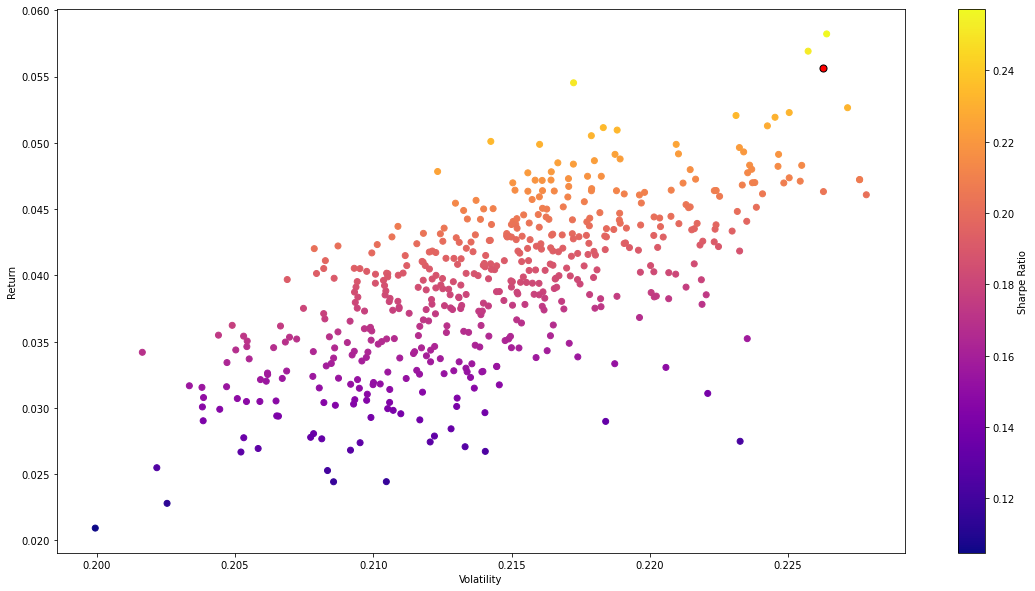

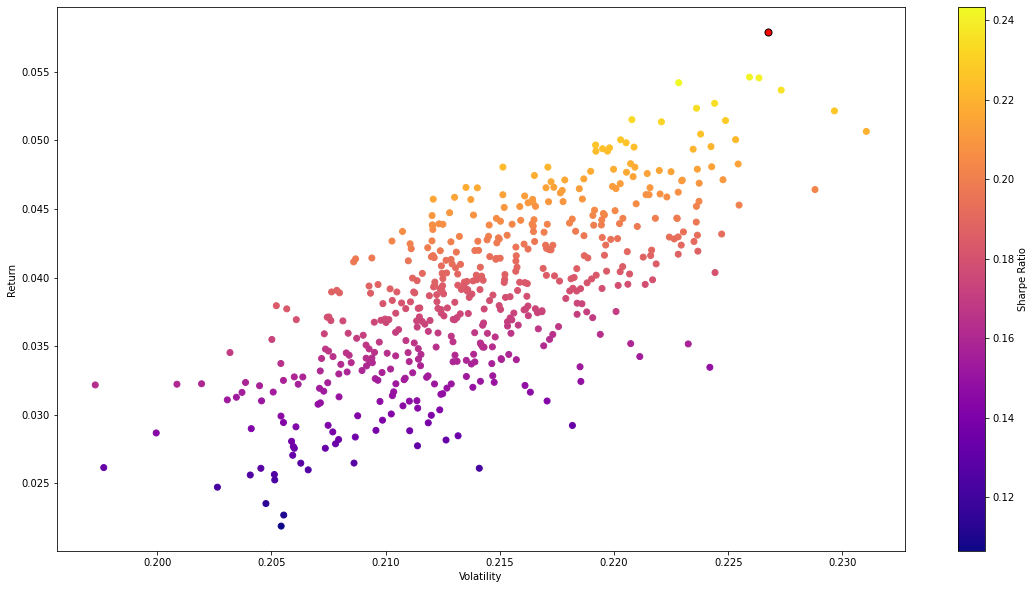

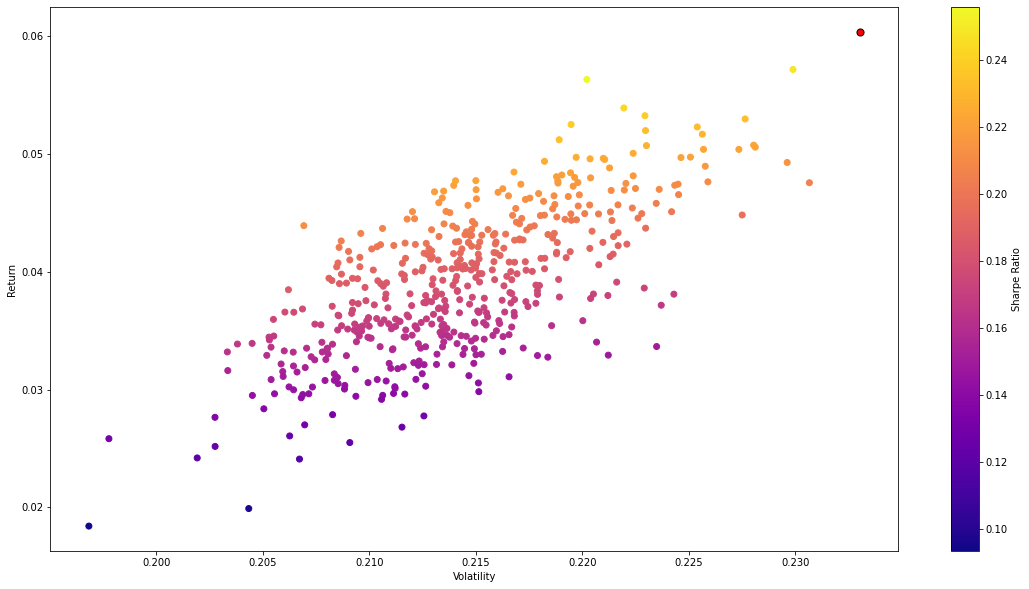

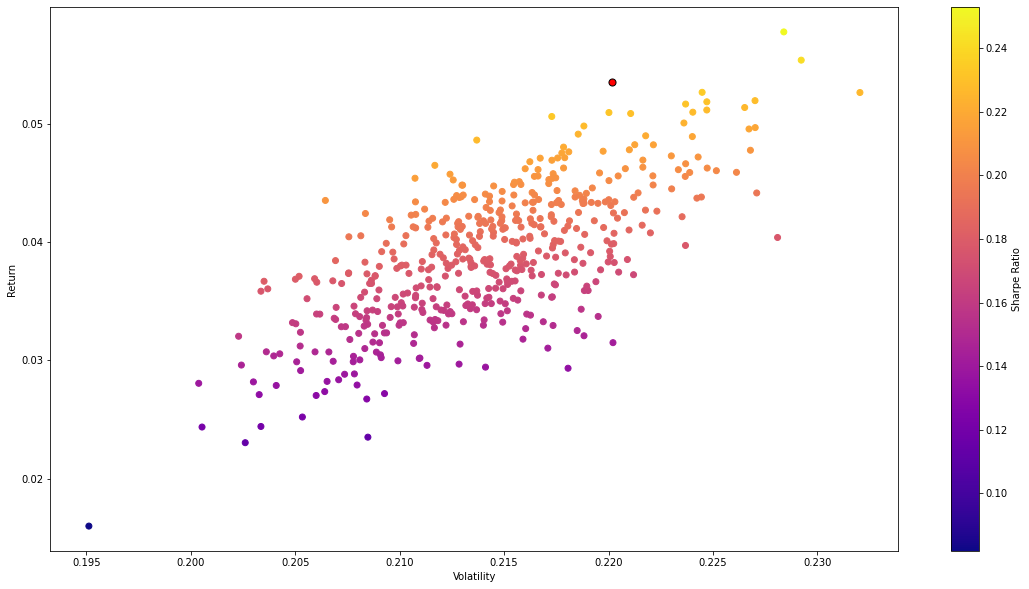

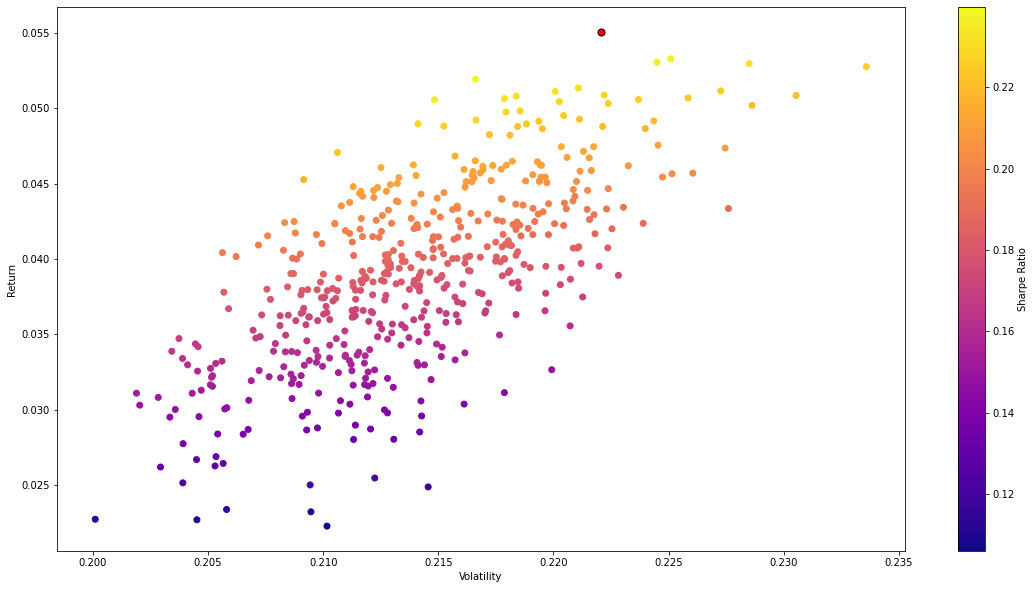

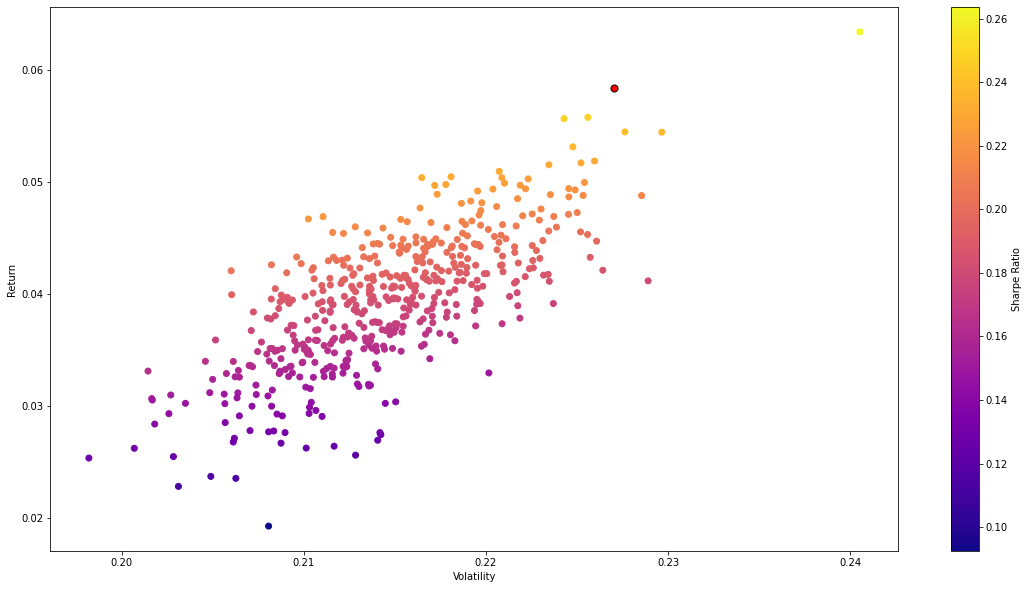

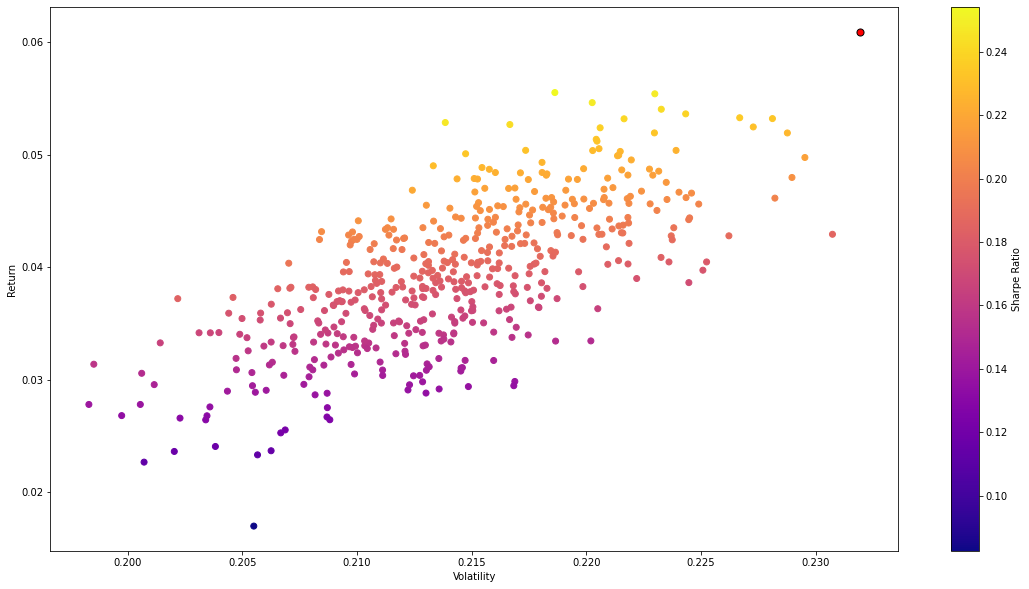

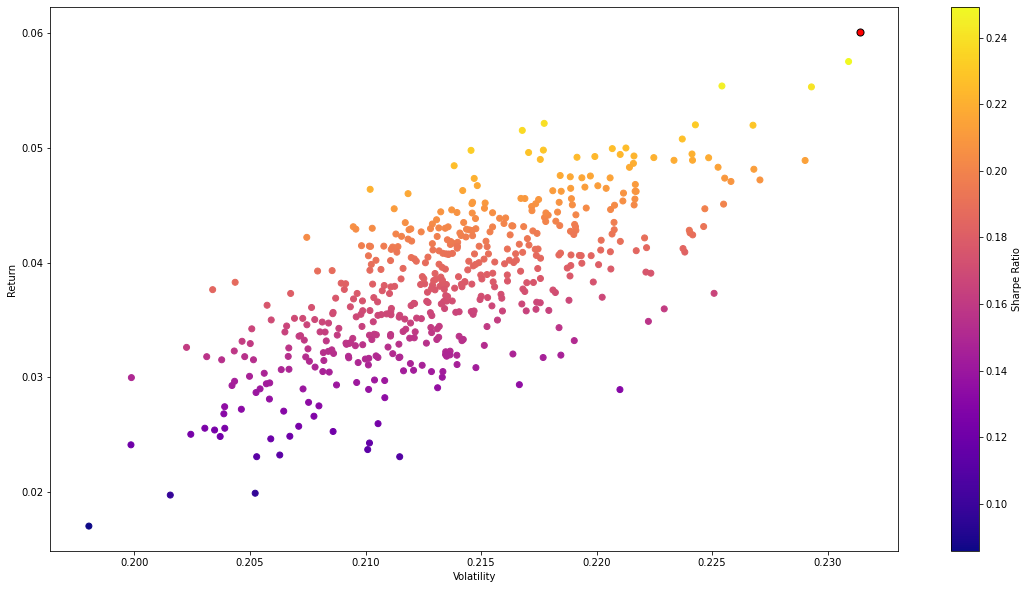

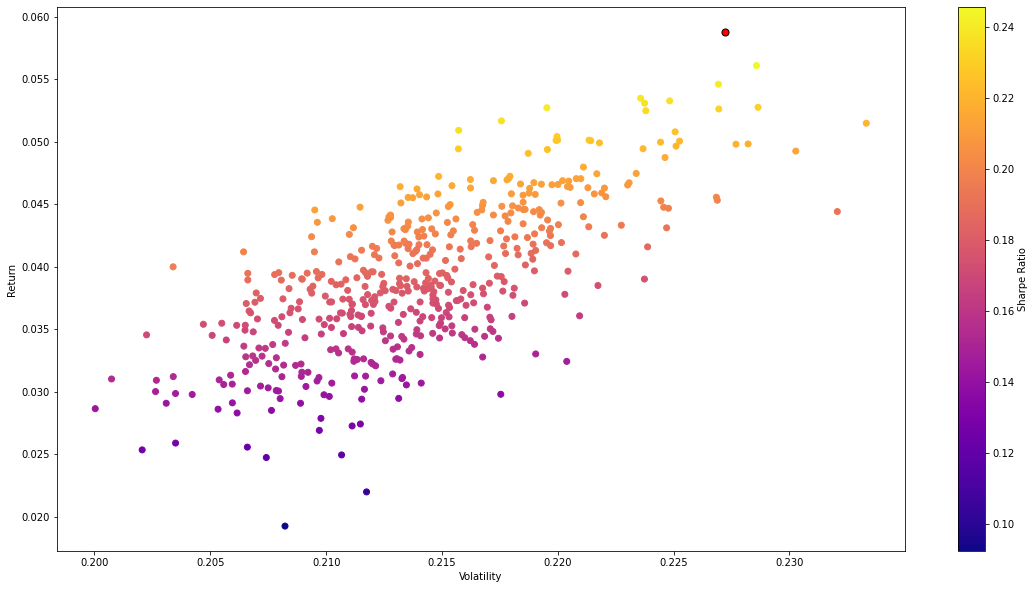

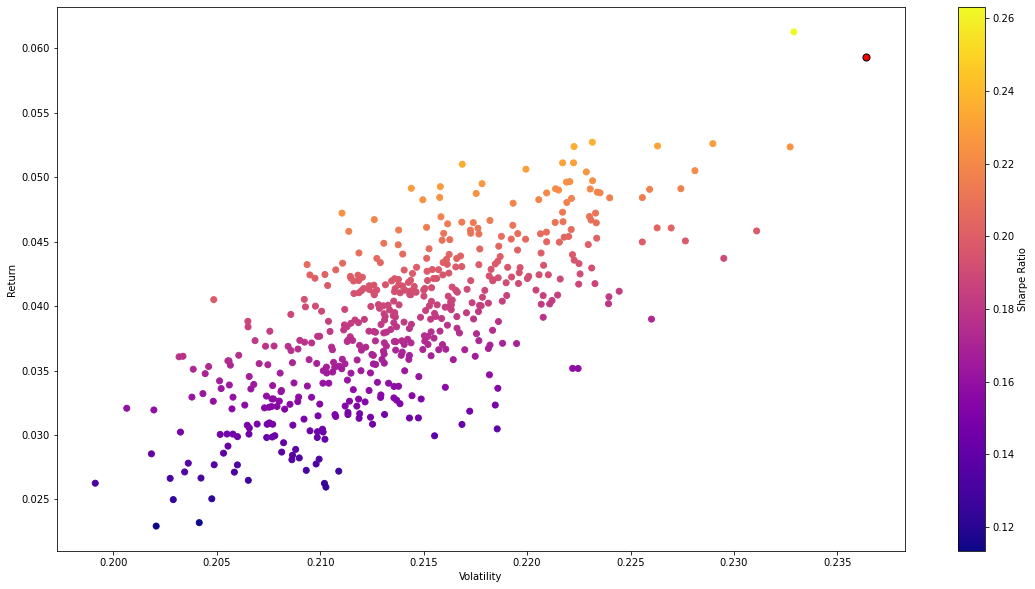

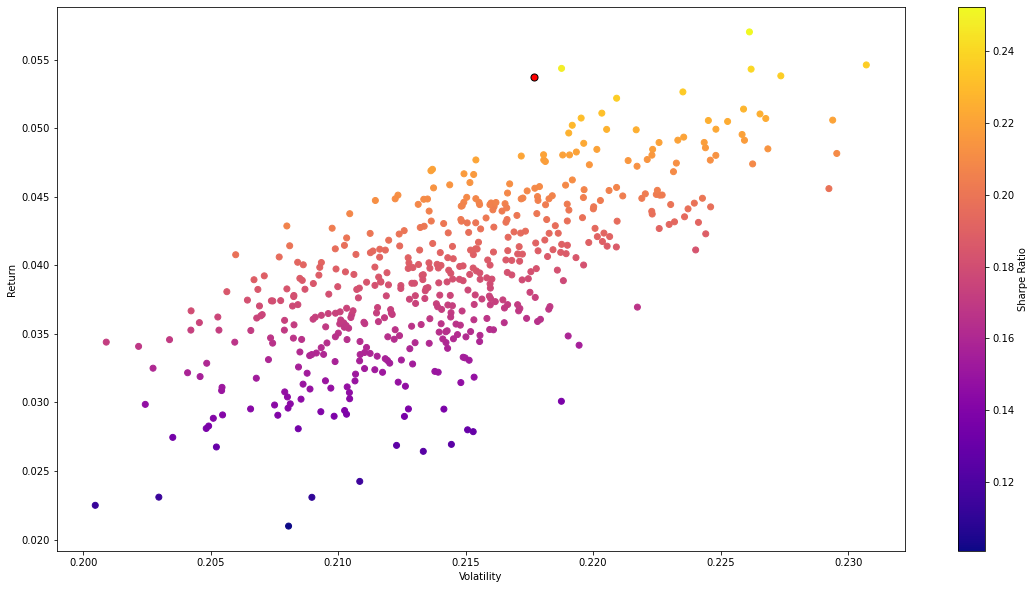

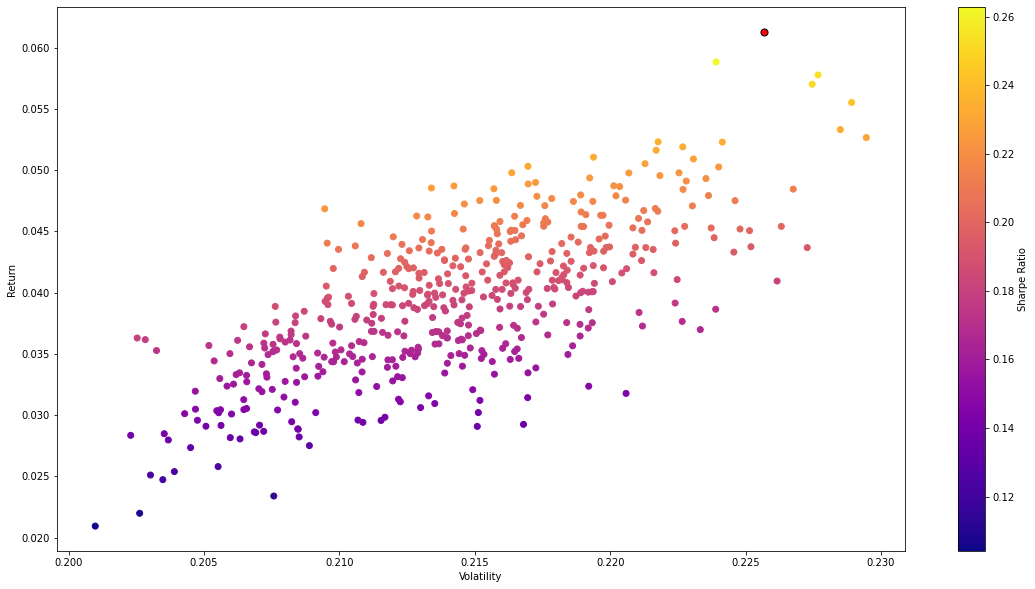

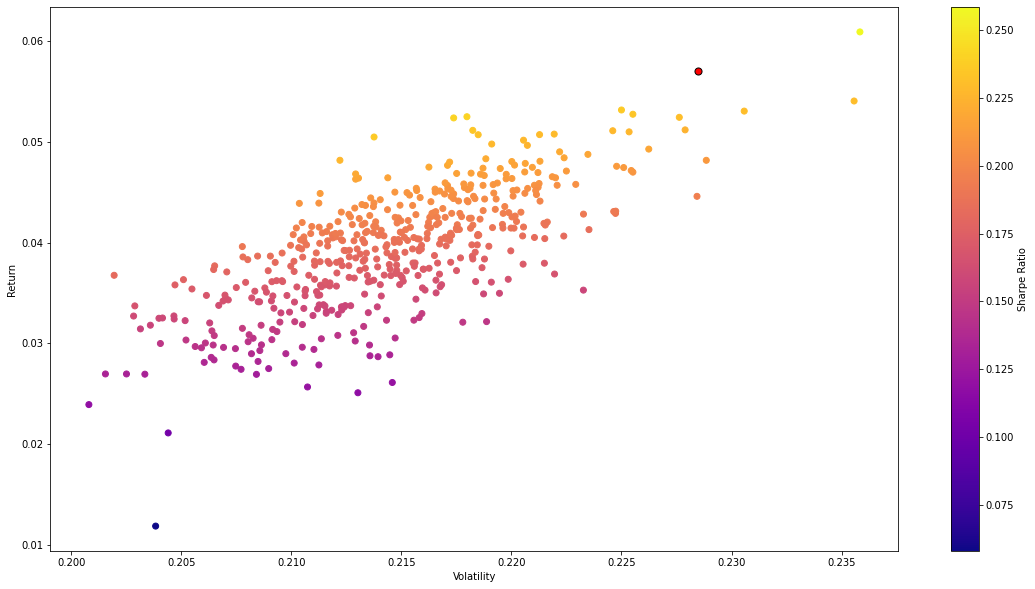

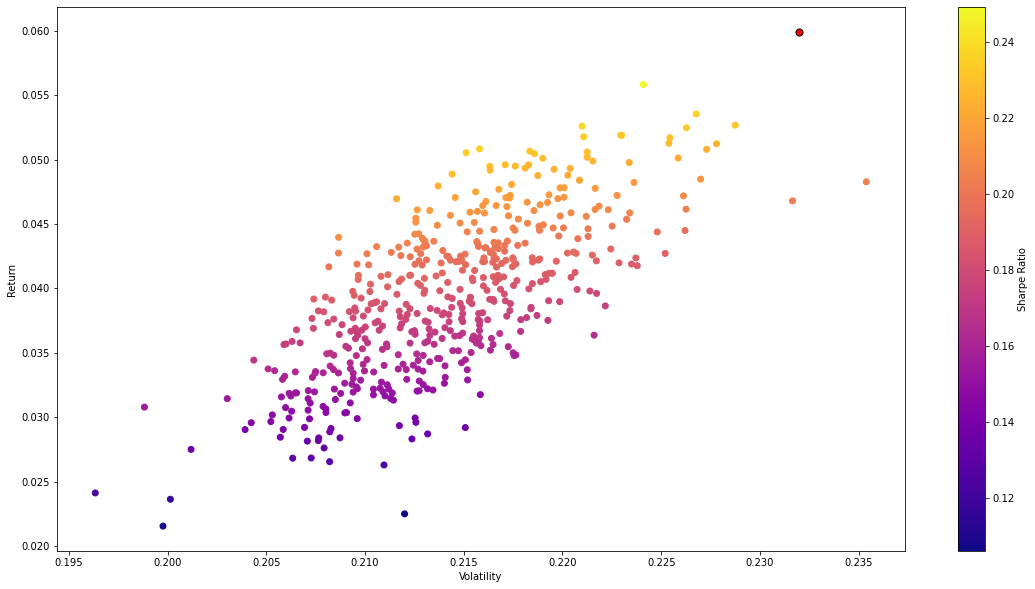

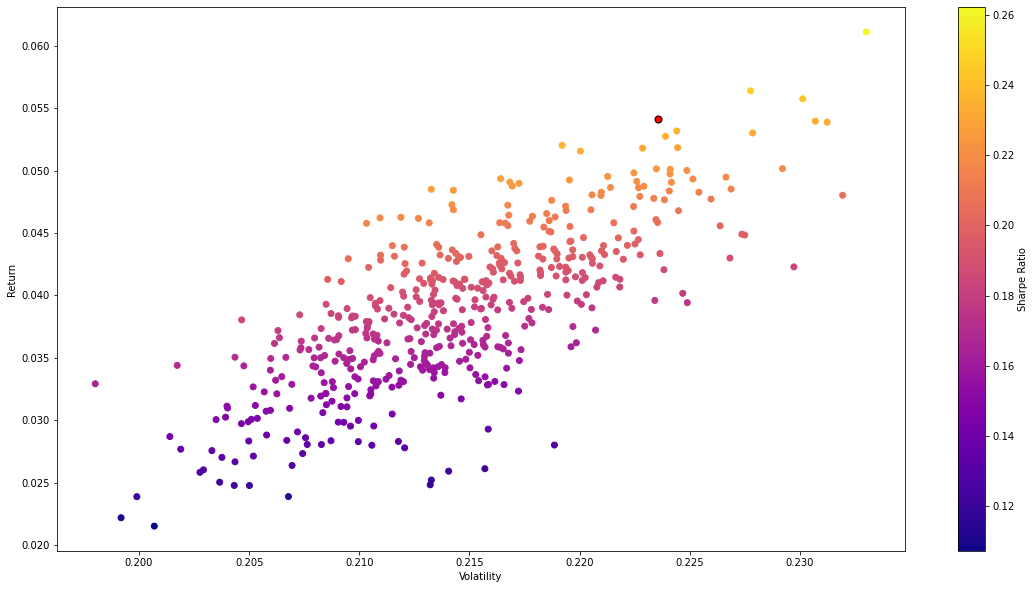

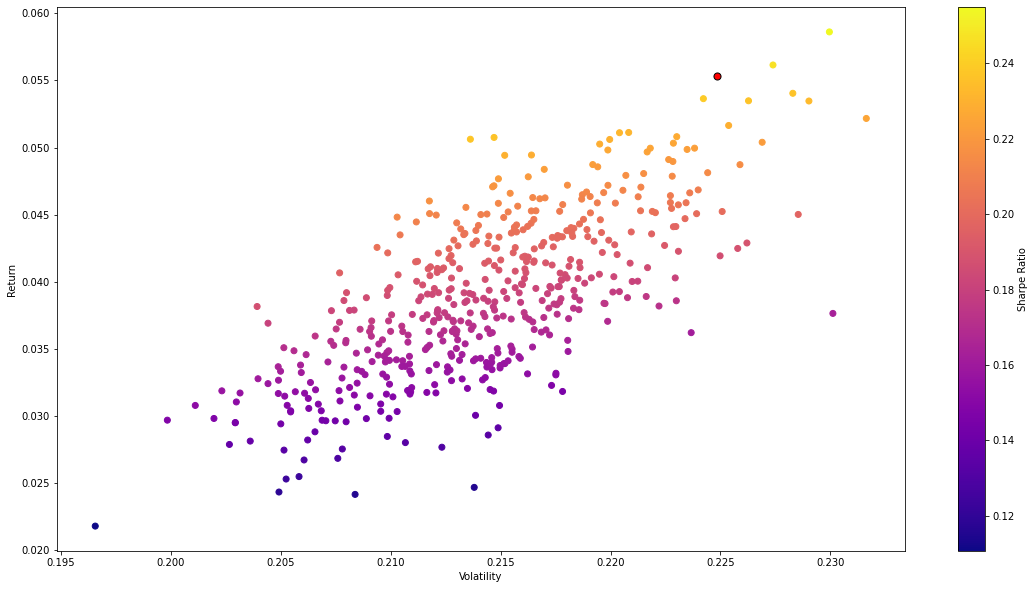

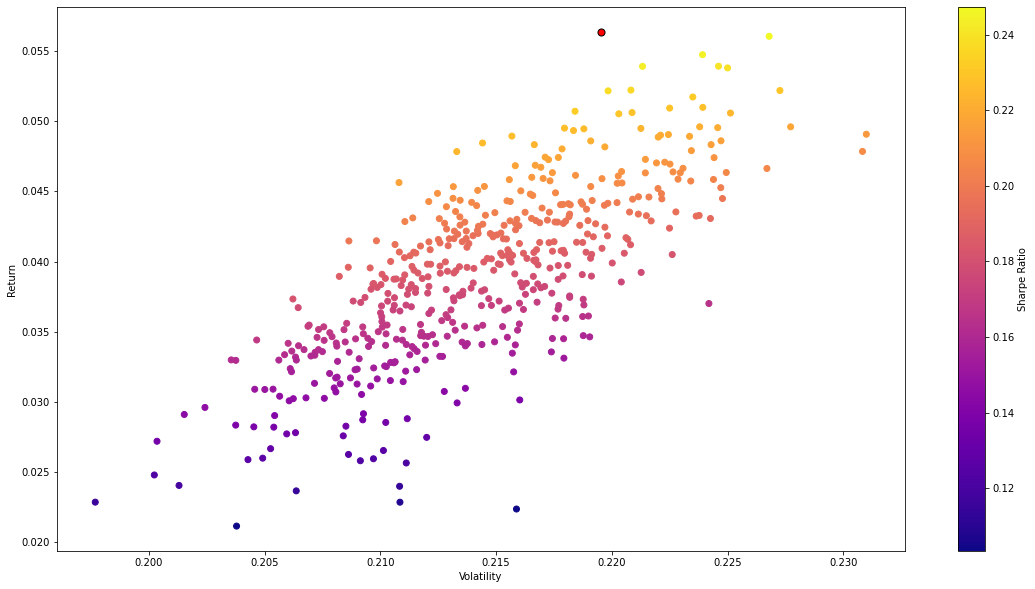

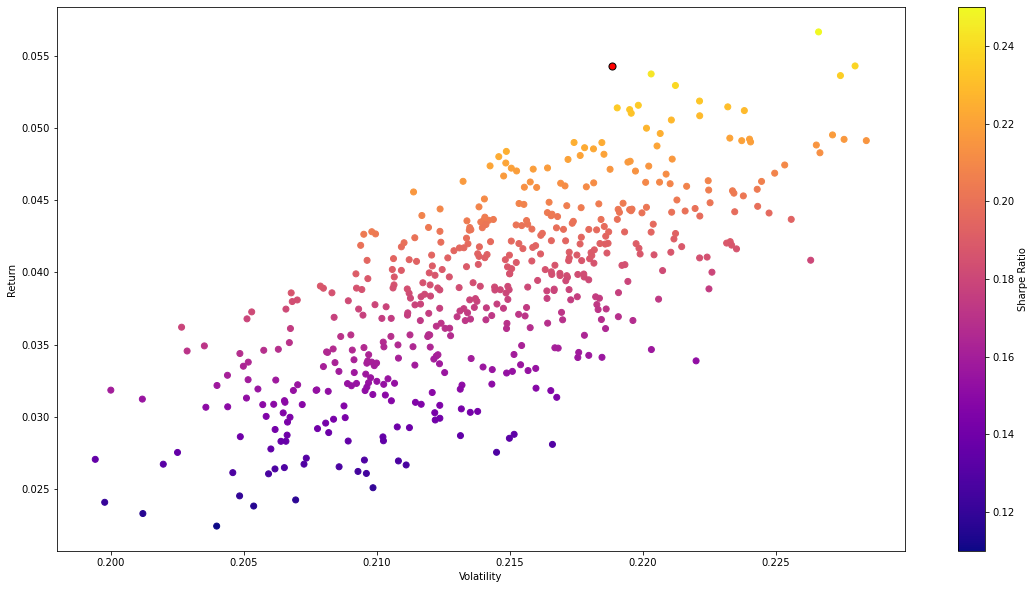

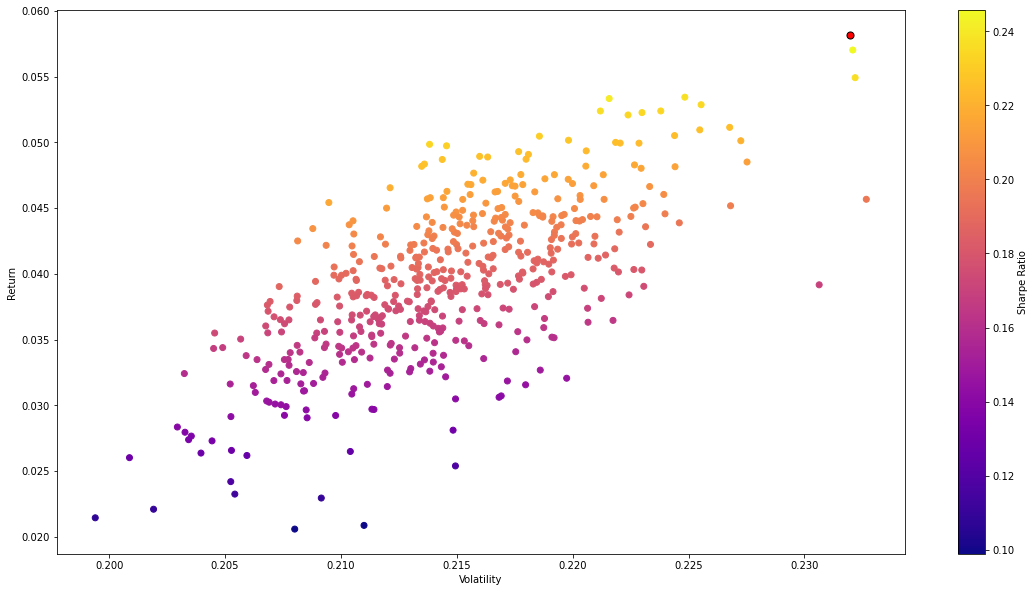

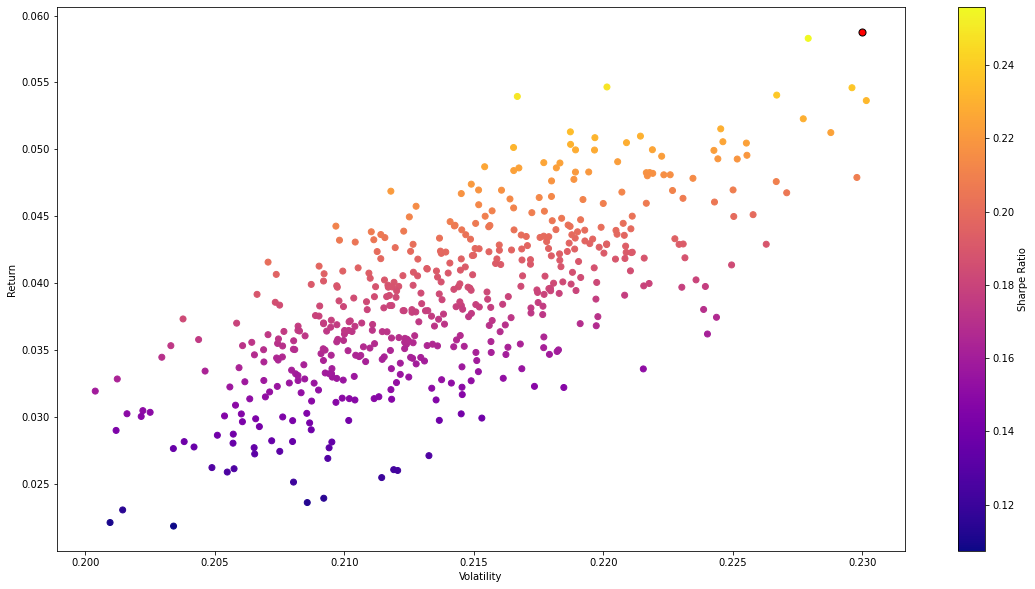

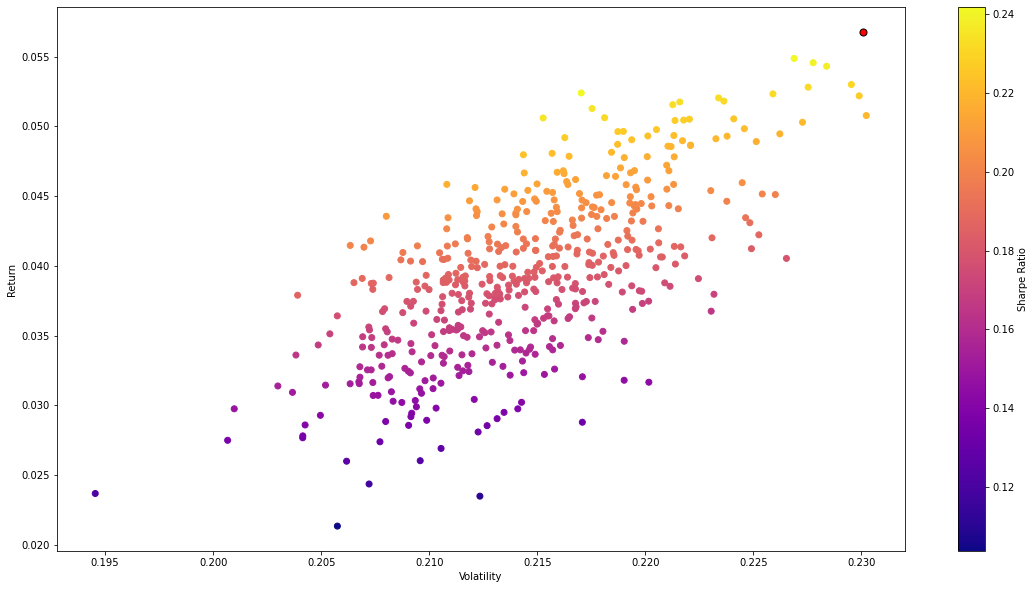

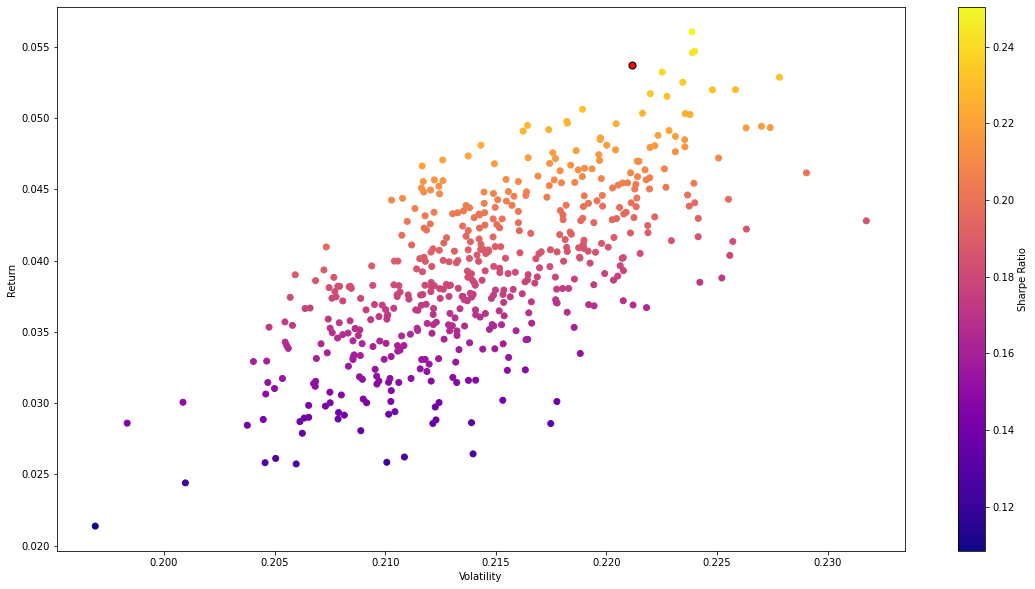

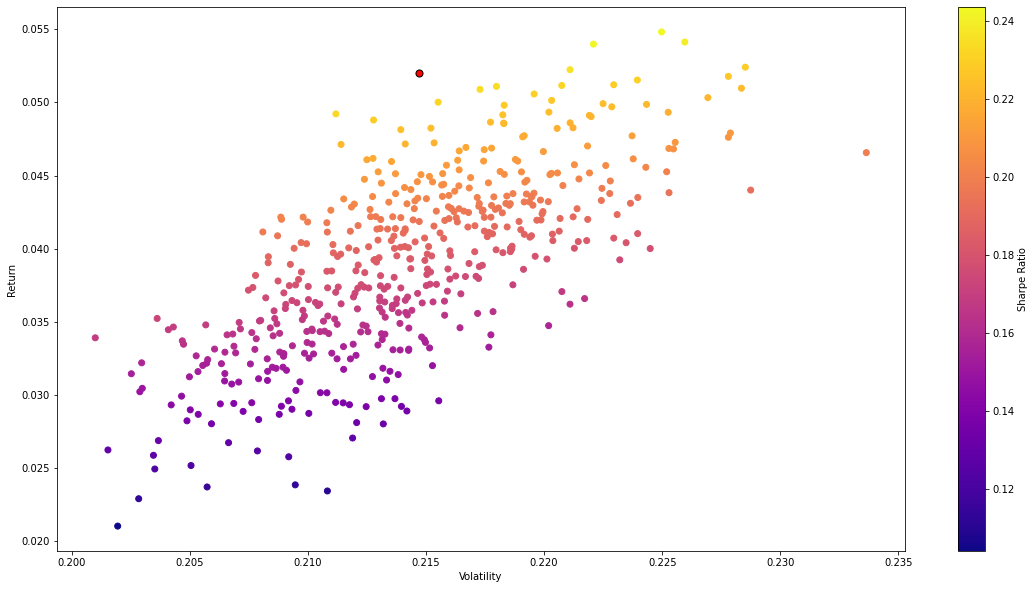

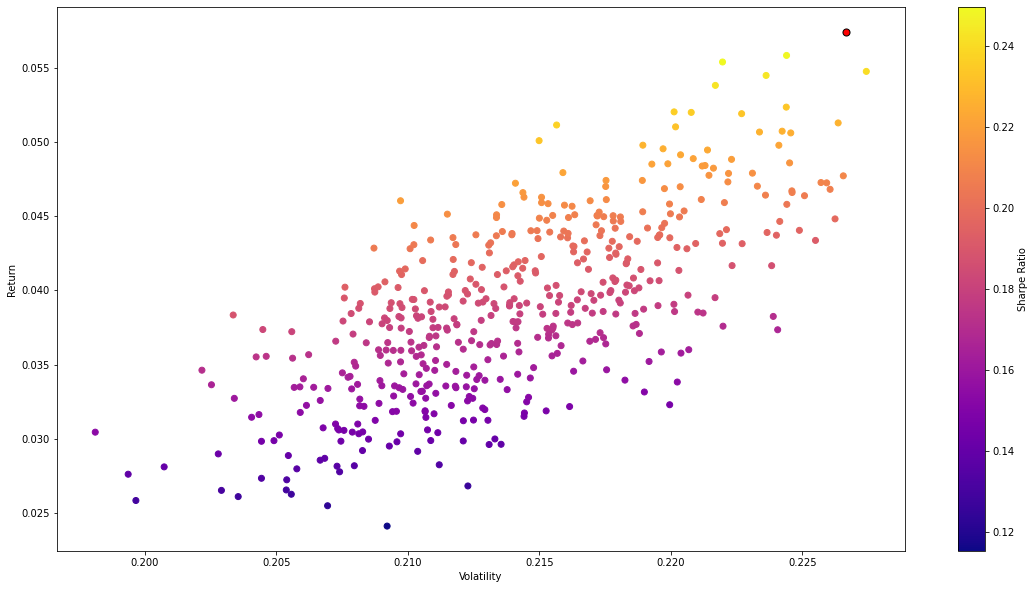

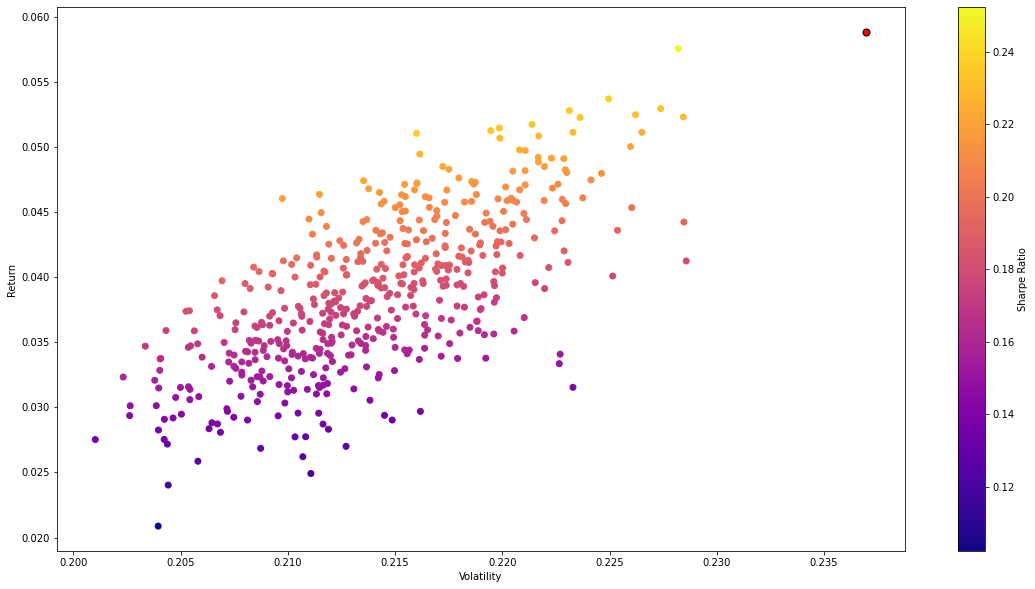

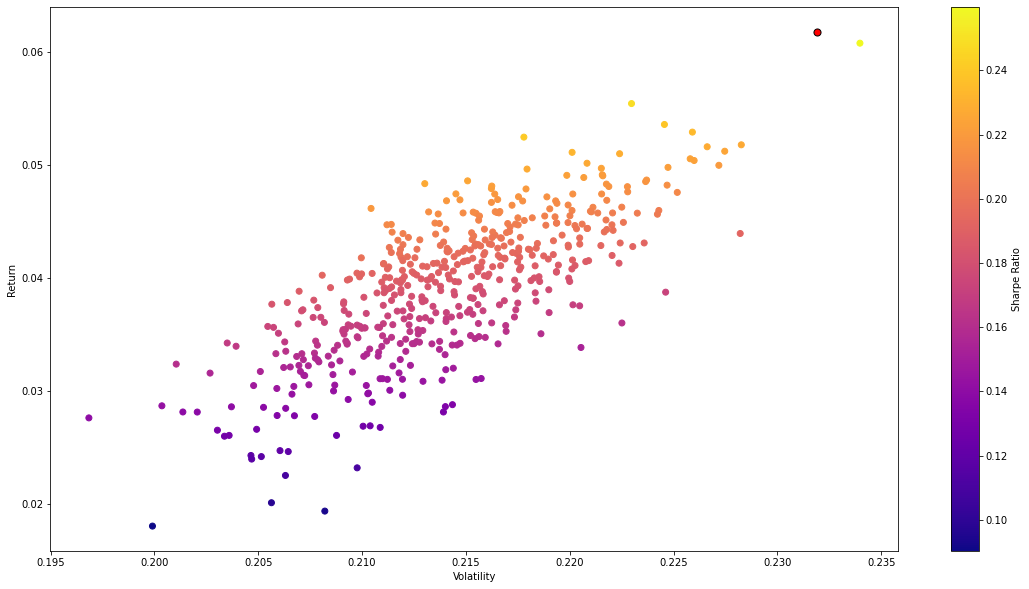

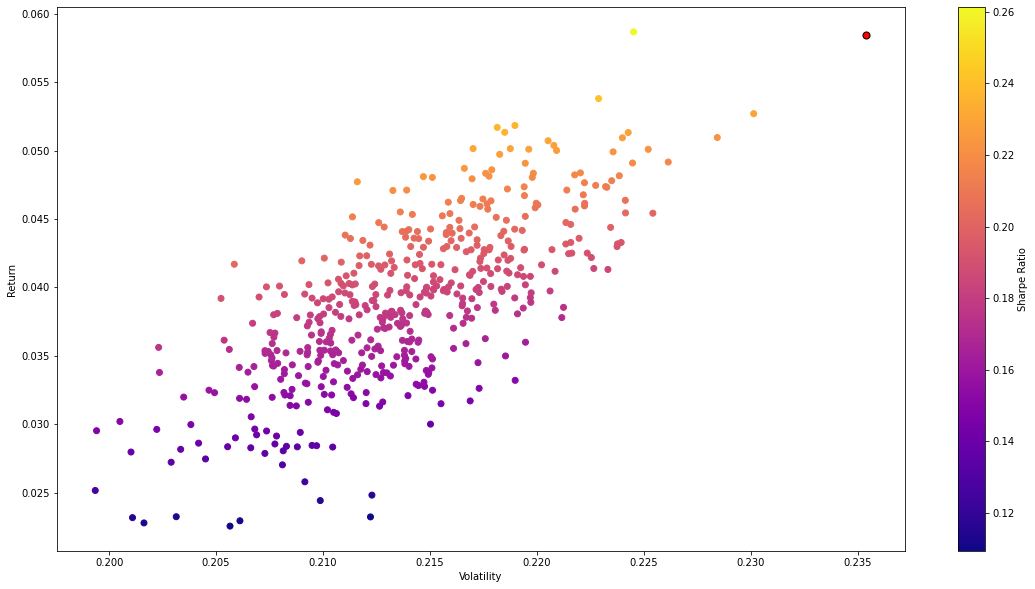

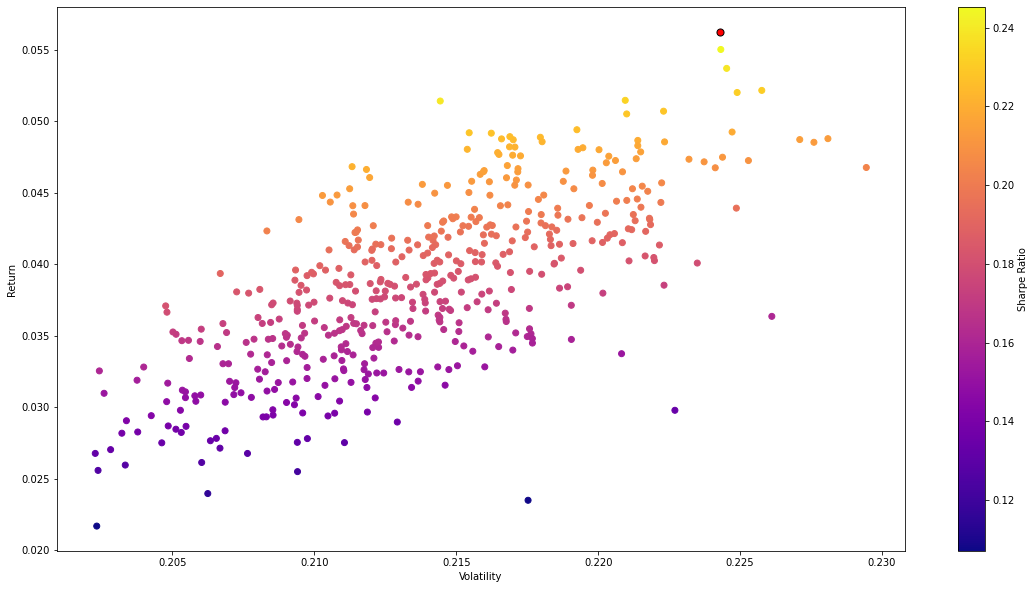

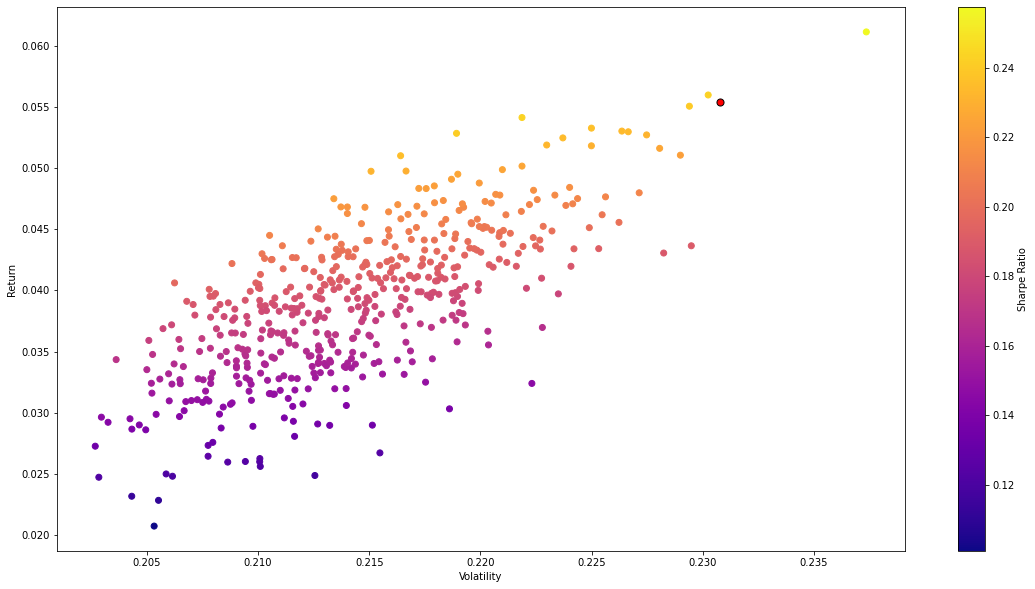

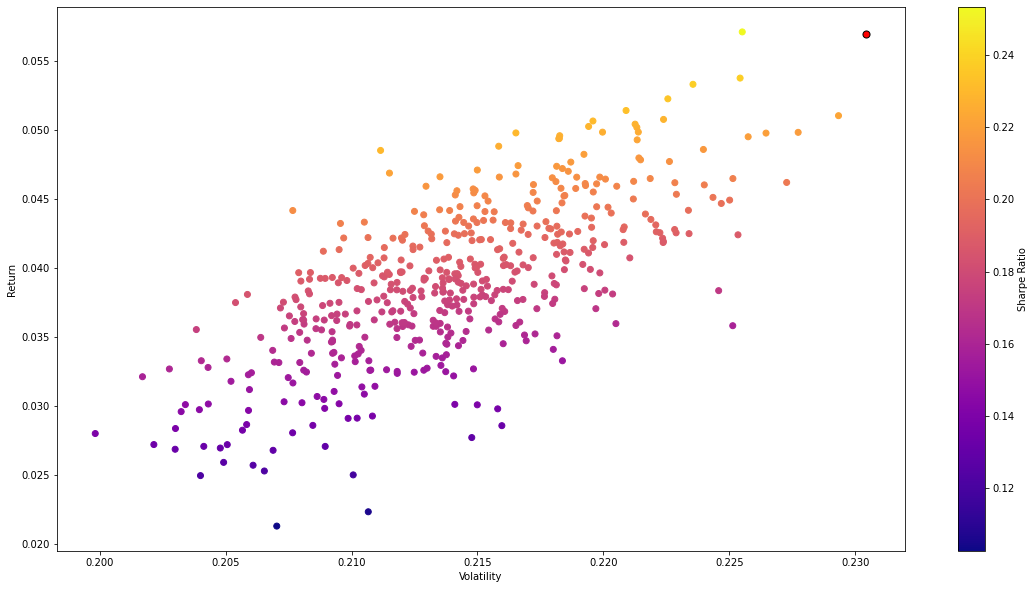

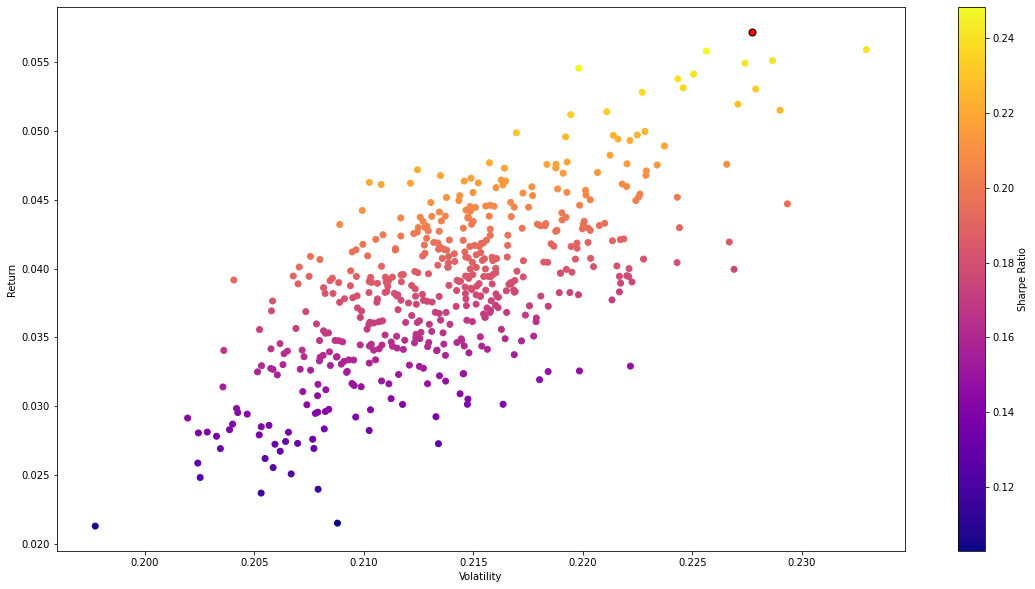

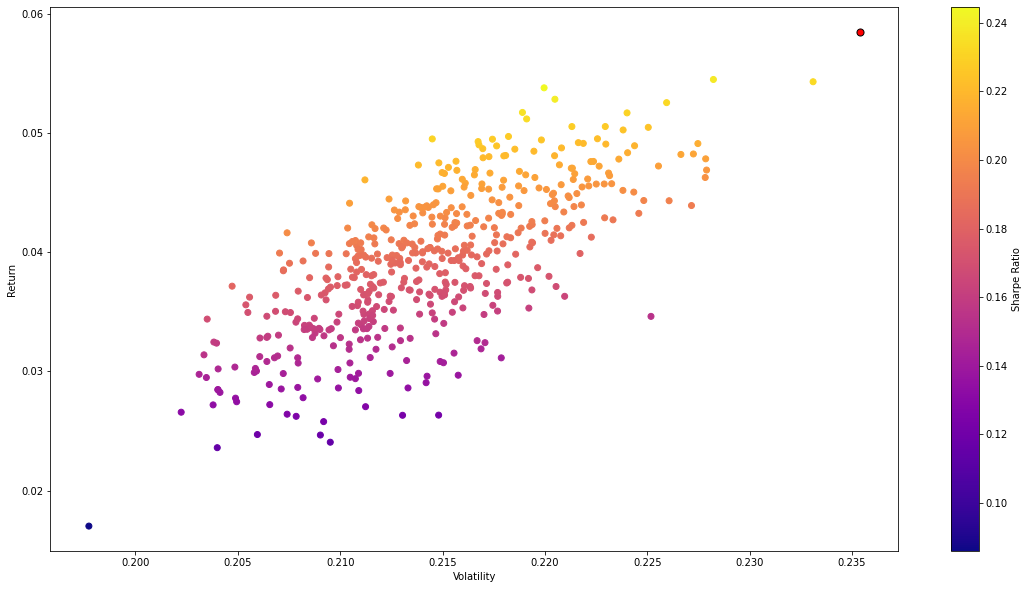

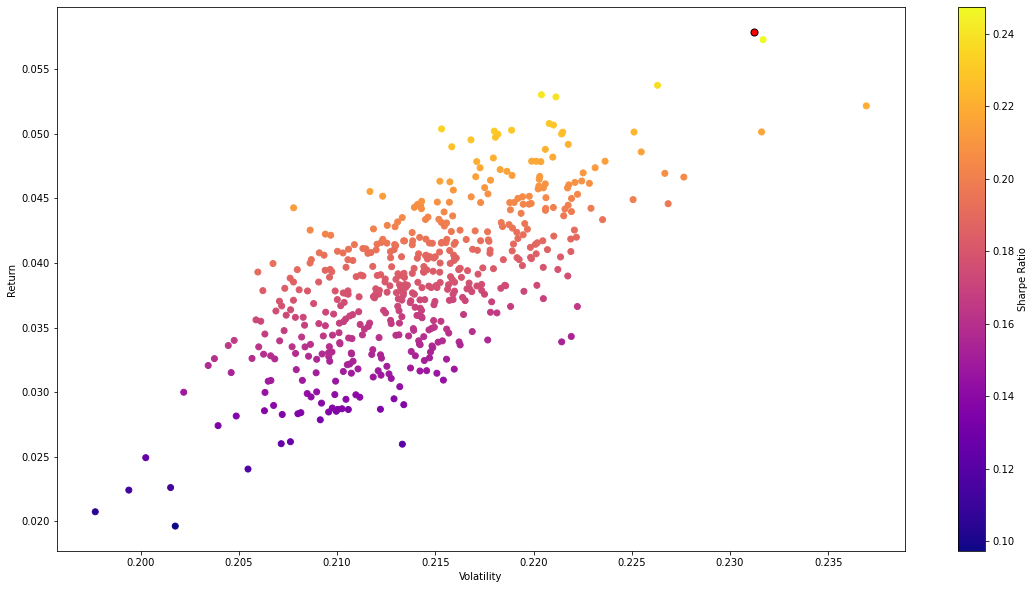

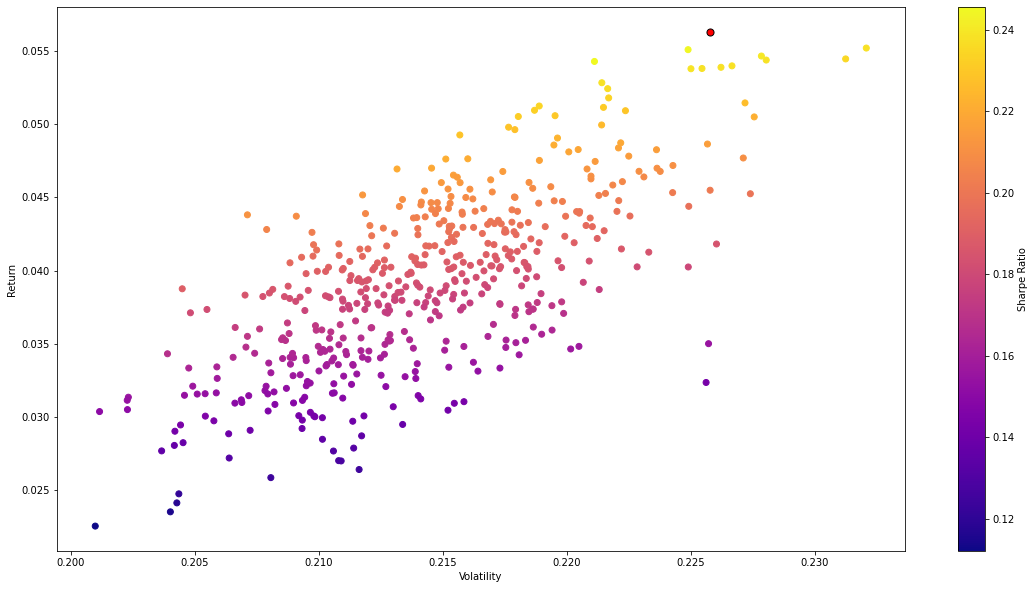

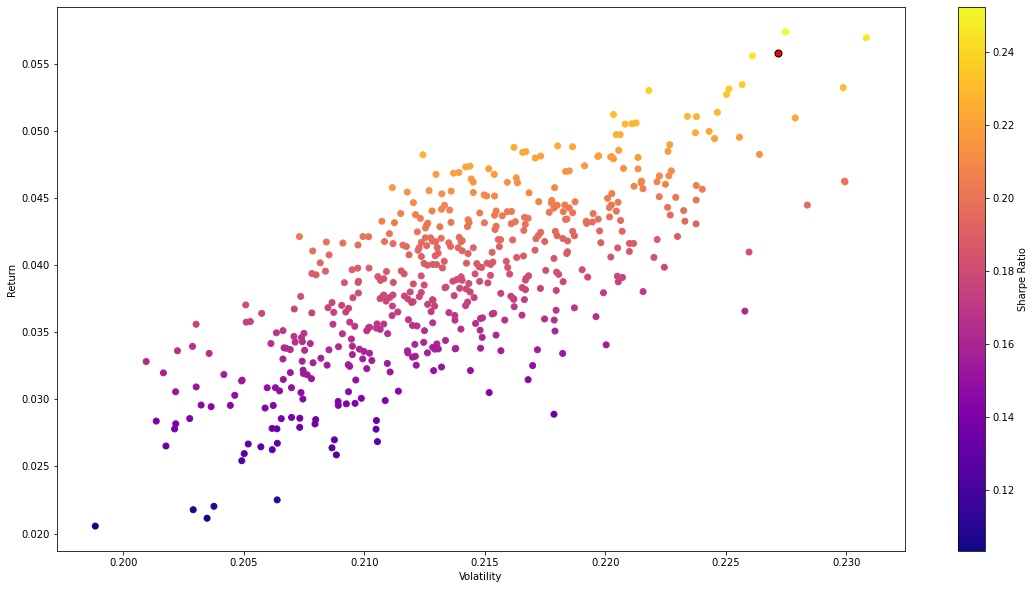

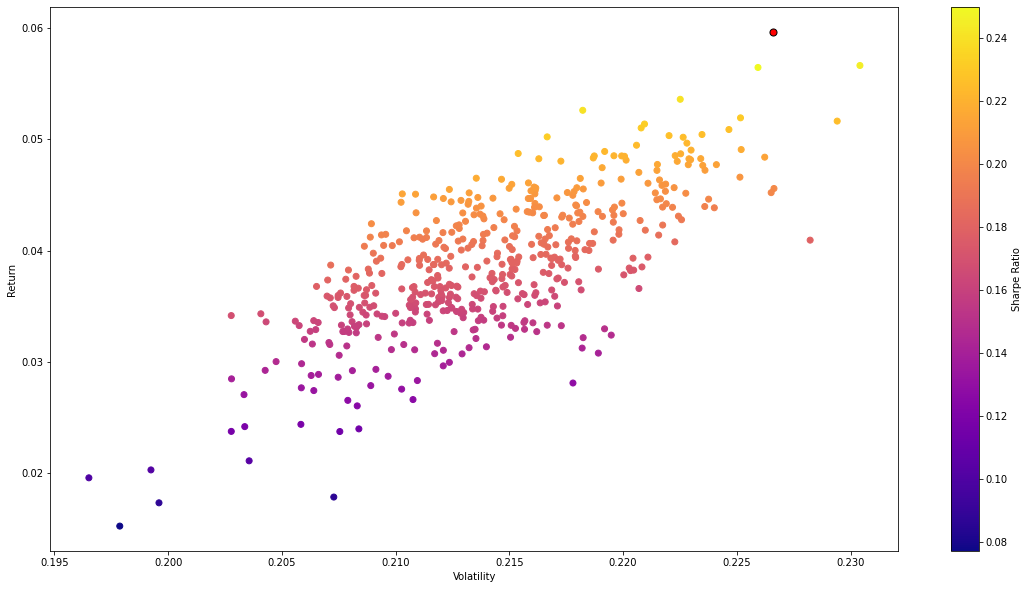

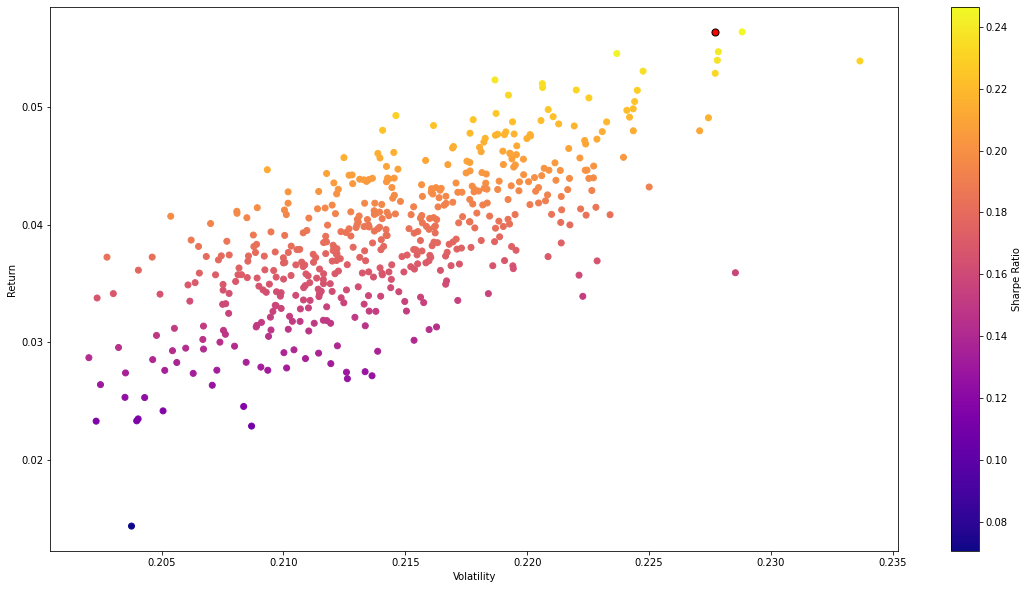

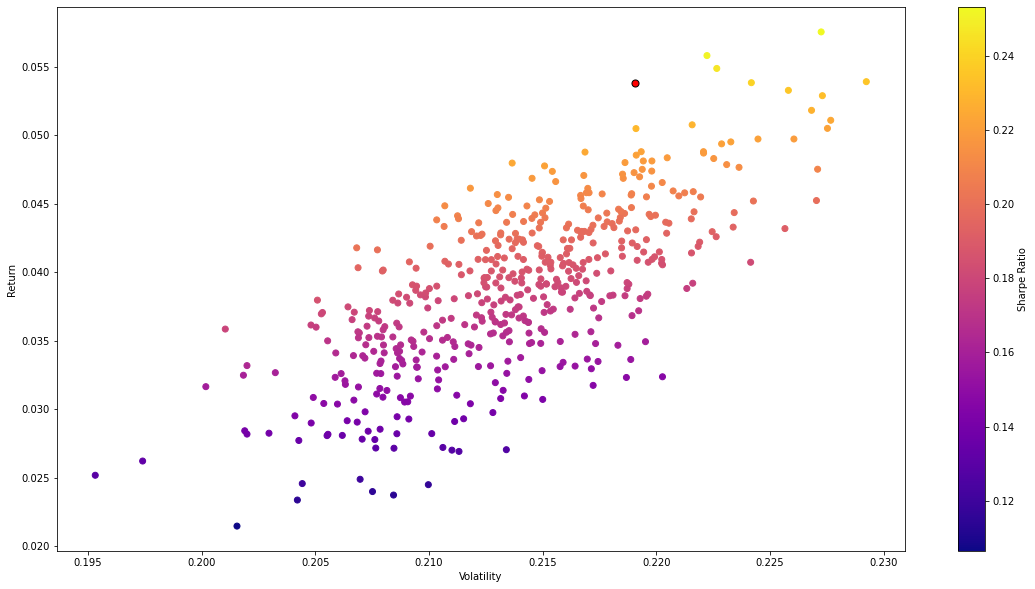

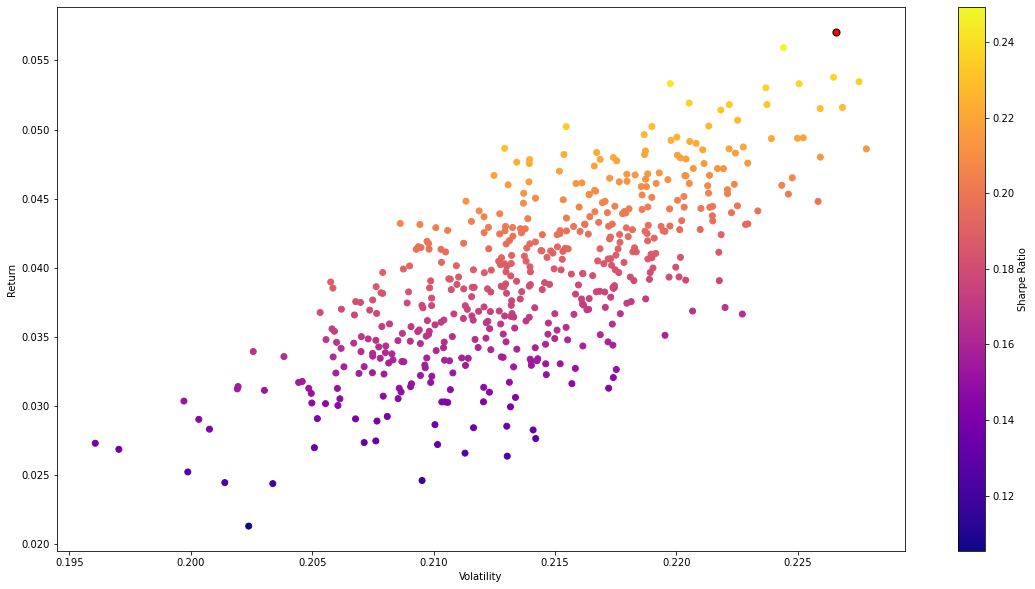

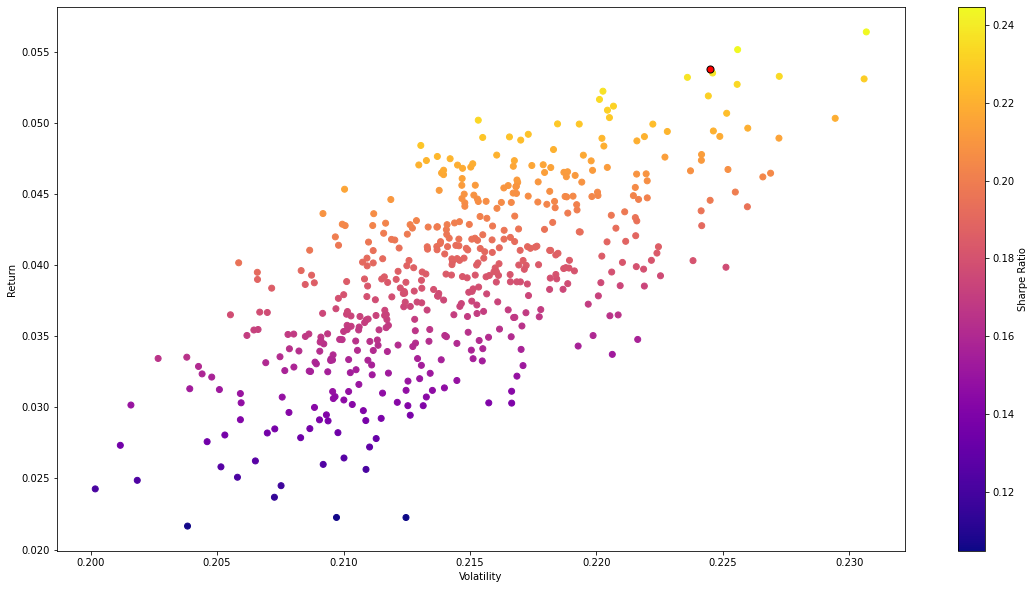

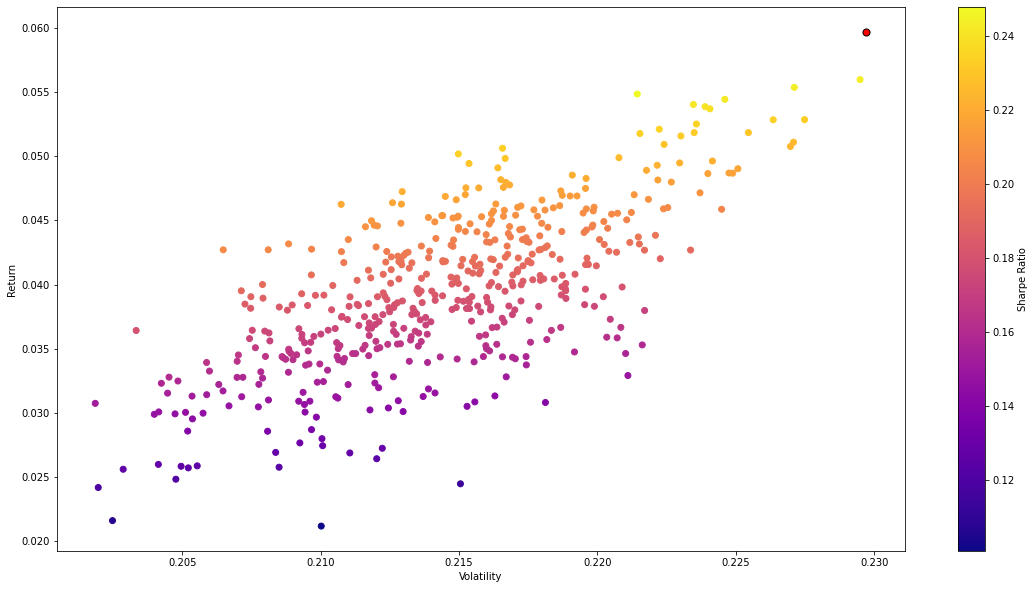

In [41]:
plot_frontier(best_portfolios, monte_carlo_results)

In [39]:
best_portfolios.mean()

BTCUSD          0.072738
XRPUSD          0.030133
ETHUSD          0.228652
LINKUSDT        0.133376
BNBUSDT         0.065189
ADAUSDT         0.177305
EOSUSDT         0.026921
TRXUSD          0.070143
NEOUSDT         0.126099
ATOMUSD         0.069444
Returns         0.057208
Sharpe Ratio    0.252367
Volatility      0.226629
dtype: float64

In [43]:
best_portfolios.median()

BTCUSD          0.051343
XRPUSD          0.027474
ETHUSD          0.220344
LINKUSDT        0.145880
BNBUSDT         0.041401
ADAUSDT         0.190431
EOSUSDT         0.023312
TRXUSD          0.044022
NEOUSDT         0.127036
ATOMUSD         0.044747
Returns         0.057136
Sharpe Ratio    0.250876
Volatility      0.227031
dtype: float64

In [77]:
best_portfolios.describe()

BTCUSD     XRPUSD     ETHUSD   LINKUSDT    BNBUSDT    ADAUSDT  \
count  54.000000  54.000000  54.000000  54.000000  54.000000  54.000000   
mean    0.072738   0.030133   0.228652   0.133376   0.065189   0.177305   
std     0.063067   0.024411   0.048683   0.061973   0.055201   0.061445   
min     0.000868   0.000169   0.124375   0.002667   0.000941   0.017520   
25%     0.031320   0.012076   0.200846   0.090576   0.026226   0.137603   
50%     0.051343   0.027474   0.220344   0.145880   0.041401   0.190431   
75%     0.102444   0.037799   0.248298   0.179383   0.100672   0.217418   
max     0.225593   0.093858   0.425054   0.255783   0.243051   0.339268   

         EOSUSDT     TRXUSD    NEOUSDT    ATOMUSD    Returns  Sharpe Ratio  \
count  54.000000  54.000000  54.000000  54.000000  54.000000     54.000000   
mean    0.026921   0.070143   0.126099   0.069444   0.057208      0.252367   
std     0.021549   0.070026   0.070105   0.060107   0.002625      0.008060   
min     0.000345   0.000165   0.008044   0.003508   0.052013      0.237142   
25%     0.008426   0.011362   0.074302   0.024399   0.055479      0.246989   
50%     0.023312   0.044022   0.127036   0.044747   0.057136      0.250876   
75%     0.039047   0.109233   0.181078   0.102857   0.058853      0.258621   
max     0.084541   0.273385   0.269774   0.264515   0.063197      0.271642   

       Volatility  
count   54.000000  
mean     0.226629  
std      0.005551  
min      0.214700  
25%      0.223251  
50%      0.227031  
75%      0.230342  
max      0.236973

In [45]:
best_portfolios.corr()

BTCUSD    XRPUSD    ETHUSD  LINKUSDT   BNBUSDT   ADAUSDT  \
BTCUSD        1.000000  0.018310 -0.151435  0.203645 -0.268678 -0.168387   
XRPUSD        0.018310  1.000000  0.400155  0.037141 -0.215892 -0.025314   
ETHUSD       -0.151435  0.400155  1.000000 -0.020238 -0.191698 -0.145860   
LINKUSDT      0.203645  0.037141 -0.020238  1.000000  0.120262 -0.239213   
BNBUSDT      -0.268678 -0.215892 -0.191698  0.120262  1.000000 -0.130001   
ADAUSDT      -0.168387 -0.025314 -0.145860 -0.239213 -0.130001  1.000000   
EOSUSDT      -0.284794  0.120067  0.167040 -0.077536 -0.116117  0.238608   
TRXUSD       -0.268247 -0.338590  0.011681 -0.410350 -0.162708 -0.184450   
NEOUSDT      -0.083281  0.025975 -0.323856 -0.219350 -0.054465 -0.339052   
ATOMUSD      -0.213359 -0.242448 -0.163292 -0.347620 -0.089920  0.173650   
Returns      -0.475339 -0.024941  0.637274 -0.063563 -0.163226  0.304015   
Sharpe Ratio -0.080416  0.022128  0.556681  0.217734 -0.200069  0.268318   
Volatility   -0.790160 -0.087145  0.464162 -0.405741 -0.048897  0.223791   

               EOSUSDT    TRXUSD   NEOUSDT   ATOMUSD   Returns  Sharpe Ratio  \
BTCUSD       -0.284794 -0.268247 -0.083281 -0.213359 -0.475339     -0.080416   
XRPUSD        0.120067 -0.338590  0.025975 -0.242448 -0.024941      0.022128   
ETHUSD        0.167040  0.011681 -0.323856 -0.163292  0.637274      0.556681   
LINKUSDT     -0.077536 -0.410350 -0.219350 -0.347620 -0.063563      0.217734   
BNBUSDT      -0.116117 -0.162708 -0.054465 -0.089920 -0.163226     -0.200069   
ADAUSDT       0.238608 -0.184450 -0.339052  0.173650  0.304015      0.268318   
EOSUSDT       1.000000 -0.201892  0.035428 -0.107200  0.029123     -0.137058   
TRXUSD       -0.201892  1.000000  0.029834  0.043141  0.013107     -0.162246   
NEOUSDT       0.035428  0.029834  1.000000 -0.251878 -0.153689     -0.148065   
ATOMUSD      -0.107200  0.043141 -0.251878  1.000000  0.050926     -0.279679   
Returns       0.029123  0.013107 -0.153689  0.050926  1.000000      0.864050   
Sharpe Ratio -0.137058 -0.162246 -0.148065 -0.279679  0.864050      1.000000   
Volatility    0.234516  0.244011 -0.096631  0.467338  0.750343      0.315869   

              Volatility  
BTCUSD         -0.790160  
XRPUSD         -0.087145  
ETHUSD          0.464162  
LINKUSDT       -0.405741  
BNBUSDT        -0.048897  
ADAUSDT         0.223791  
EOSUSDT         0.234516  
TRXUSD          0.244011  
NEOUSDT        -0.096631  
ATOMUSD         0.467338  
Returns         0.750343  
Sharpe Ratio    0.315869  
Volatility      1.000000